<a href="https://colab.research.google.com/github/siliconemonster/AD-TrabalhoFinal/blob/main/Simula%C3%A7%C3%A3o_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas

In [250]:
from collections import Counter
import copy
import fractions
from fractions import Fraction
import itertools
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
import math
from math import *
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import numpy as np
from numpy import random
from numpy.linalg import matrix_power
import pandas as pd
import queue 
import random
from random import sample
from random import random
from scipy.stats import poisson
import sympy as sy
from sympy import Matrix

# Funções Auxiliares

In [251]:
# Função para validar parâmetro passado para a função
def validaParametro(parametro, paramValidos, parametroPassado):

    if parametroPassado not in paramValidos:
        raise ValueError("Parâmetro " + str(parametro) + ": valor passado de ver estar entre os seguintes valores: " + str(paramValidos))


In [252]:
# Função para inicializar uma cache
def initializeCache(numConteudos, tamCache):
  conteudos = list(range(1, numConteudos + 1))
  cache = sample(conteudos, k = tamCache)
  
  return cache

In [253]:
# Função para muda o estado da cache
def cacheReceivesReq(caso, cacheEnt, conteudo, depurar = False):
  cache = cacheEnt.copy()
  RequisicaoAtendida = 0
  #print("Conteudo Requisitado: " + str(requisicao))
  #print("Cache:" + str(cache))

  if (conteudo in cache):
    if (caso == "FIFO" or caso == "Random" or caso == "Estatica"):
      cache = cache
      RequisicaoAtendida = 1    
      if (depurar): print("Cache possui requisição!")
      if (depurar): print("Cache permanece inalterada.")

    elif (caso == "LRU"):
      RequisicaoAtendida = 1    
      if (depurar): print("Cache possui requisição!")

      if (depurar): print("Conteúdo requisitado ficará na primeira posição.")
      cache.remove(conteudo)
      cache.insert(0, conteudo)
      if (depurar): print("Novo estado da cache: " + str(cache)) 
   
  else:
    if (depurar): print("Cache não possui conteúdo da requisição )=")    
    if (caso == "FIFO" or caso == "LRU"):
      if (depurar): print("Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.") 
      cache.insert(0, conteudo)
      del cache[-1]
      if (depurar): print("Novo estado da cache: " + str(cache)) 

    elif (caso == "Random"):
      if (depurar): print("Conteúdo requisitado entrará numa posição aleatória.")
      pos = random.randint(0,2)
      cache[pos] = conteudo
      if (depurar): print("Novo estado da cache: " + str(cache))

    elif (caso == "Estatica"):
      if (depurar): print("Cache permanece inalterada.")
      cache = cache

  return cache, RequisicaoAtendida

In [254]:
# Função para verificicar se a cache possui conteúdo, utilizada pelo simulador dos cenários III e IV
def cacheReceivesReq3_4(caso, cacheEnt, conteudo, depurar = False):
  cache = cacheEnt.copy()
  RequisicaoAtendida = 0
  #print("Conteudo Requisitado: " + str(requisicao))
  #print("Cache:" + str(cache))

  if (conteudo in cache):
    if (caso == "FIFO" or caso == "Random" or caso == "Estatica"):
      cache = cache
      RequisicaoAtendida = 1    
      if (depurar): print("Cache possui requisição!")
      if (depurar): print("Cache permanece inalterada.")

    elif (caso == "LRU"):
      RequisicaoAtendida = 1    
      if (depurar): print("Cache possui requisição!")

      if (depurar): print("Conteúdo requisitado ficará na primeira posição.")
      cache.remove(conteudo)
      cache.insert(0, conteudo)
      if (depurar): print("Novo estado da cache: " + str(cache)) 
   
  else:
    if (depurar): print("Cache não possui conteúdo da requisição )=")
    
  return cache, RequisicaoAtendida

In [255]:
# Função para mudar o estado da cache, utilizada pelo simulador dos cenários III e IV
def servidor_atende_cache3_4(caso, cacheEnt, conteudo, depurar = False):
  cache = cacheEnt.copy()

  if (caso == "FIFO" or caso == "LRU"):
        if (depurar): print("Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.") 
        cache.insert(0, conteudo)
        del cache[-1]
        if (depurar): print("Novo estado da cache: " + str(cache)) 

  elif (caso == "Random"):
    if (depurar): print("Conteúdo requisitado entrará numa posição aleatória da cache.")
    pos = random.randint(0,2)
    cache[pos] = conteudo
    if (depurar): print("Novo estado da cache: " + str(cache))

  elif (caso == "Estatica"):
    if (depurar): print("Cache permanece inalterada.")
    cache = cache

    return cache

In [256]:
# Função para calcular o intervalo de confiança
def intervaloDeConfianca(n, cenario, caso, numConteudos, tamCache, probabilidades, teta, cachesDiferentes = True, p = 0.9):
  
  experimentosMedia = []
  
  for i in range (n):  

    if (cenario == 3 or cenario == 4):
      sucessos = simulacaoCenario3_4(100000,"FIFO", 3, 2 , [1/3,1/3,1/3], teta = teta, depurar = False)
      #sucessos = simulacaoCenario3_4(100000, caso, numConteudos ,tamCache, probabilidades, teta = teta, cachesDiferentes = cachesDiferentes)

    else:

      cache1, cache2, sucessos = eval("simulacaoCenario" + str(cenario) + 
                                      "(100000, caso, numConteudos ,tamCache, probabilidades, cachesDiferentes = cachesDiferentes)")
    
    
    experimentosMedia.append(sucessos) 
  
  media = np.mean(experimentosMedia)
  variancia = np.var(experimentosMedia)

  # Intervalo de Confiança para a Variância
  intervalo_de_confianca = []

  desvio = sqrt(variancia)
  intervalo_de_confianca.append(media - 1.96 * desvio/ sqrt(n))
  intervalo_de_confianca.append(media + 1.96 * desvio/ sqrt(n))

  print("Cenário: " + str(cenario))
  print("Caso: " + caso)
  print("Tamanho de cada cache: " + str(tamCache))
  print("Número de conteúdos: " + str(numConteudos))
  print("Intervalo de Confiança: " + str(intervalo_de_confianca))
  print("-------- \n")

  return intervalo_de_confianca

# I. Simulação Cenário I

## Função da Simulação do Cenário I

<h3> Parâmetros de entrada para a função

O simulador do cenário I é dado pela função abaixo que tem os seguintes parâmetros de entrada:

*   $numRequisicoes$ - Número de requisões que serão realizadas no experimento. Deve ser um número inteiro maior que $0$.
*   $caso$ - qual é o caso/tipo das caches. Os possíveis valores de entrada são: "FIFO", "LRU", "Random" ou "Estatica"
*   $numConteudos$ - número de conteúdos que podem ser requisitados. Deve ser um número inteiro maior que $0$.
*   $tamCache$ - tamanho das caches. Deve ser um número inteiro maior que $0$.
*   $probabilidades$ - probabilidade de cada conteúdo ser requisitado. Deve ser passado uma lista de tamanho igual ao número de conteúdos. Por exemplo, se são três conteúdos e possuem probabilidade de requisição uniforme, a lista passada deverá ser $[1/3,1/3,1/3]$
*   $depurar$ - Booleano para indicar se deseja imprimir a depuração do código ou não. O default é o valor "False", onde não se depura.
*   $cache1\_inicial$ - Estado inicial de uma cache. Se nada for passado, ela irá ser inicializada aleatóriamente.
*   $cache2\_inicial$ - Estado inicial da outra cache. Se nada for passado, ela irá ser inicializada aleatóriamente.
*   $cachesDiferentes$ - Booleano para indicar se deseja que as caches comecem em estados diferentes ou iguais. O default é o valor "True", onde começam com em estados diferentes.

<h3> Descrição do Simulador

Inicialmente, as caches são incializadas com os estados passados, caso não sejam passados, elas são inicializadas de forma aleatória com os conteúdos possíveis, que nesse caso serão representados por números inteiros de $1$ ao $numConteudos$ dado. 

Após isso, agenda-se um evento de uma requisição para cada conteúdo na lista de eventos, esse evento idica qual o tempo em que a requisição irá acontecer e qual conteúdo estará sendo requisitado. O tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial tendo como parâmetro a taxa do conteúdo e a cada vez que um evento é adicionado, a lista é ordenada em função dos tempos apresentados em cada evento. 

Com as caches inicializadas e uma requisição agendada para cada conteúdo, começa-se a realização dos eventos, ou seja, as requisições agendadas começam a ser a realizadas. Em termos de código, inicia-se um loop em cima da lista de eventos, onde em cada iteração, a requsição com menor tempo presente na lista é encaminhada paras as duas caches e para cada cache é realizado o seguinte processo: analisá-se se a cache possui o conteúdo requisitado e assim marca-se se a requisição foi atendida ou não, em ambos os casos a cache muda de estado seguindo o padrão do tipo de cache especificado. Após ser encaminhada para as duas caches, verifica-se a requisição foi atendida por pelo menos uma das caches, se sim, é marcado como sucesso. Após uma requsição ser feita, é agendada uma nova requisição para o mesmo conteúdo onde o tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial com parâmetro igual a probabilidade do conteúdo, dessa forma garantimos que cada conteúdo seja requisitado seguindo sua taxa de chegada.

Após o número de requisições pedidas serem feitas, verifica-se o número de sucessos e finalmente calcula-se a probabilidade de sucesso fazendo o seguinte cálculo: $numero\ de\ sucessos/numero\ de\ requisicoes\ realizadas$


In [257]:
def simulacaoCenario1(numRequisicoes, caso, numConteudos, tamCache, probabilidades, depurar = False,cache1_inicial = False, cache2_inicial = False, cachesDiferentes = True):

  validaParametro("caso", ["FIFO", "LRU", "Random", "Estatica"], "LIFO")
  
  Requisicoes = []
  taxa = 1*probabilidades
  
  # agendando uma requisição para cada conteúdo
  for i in range (numConteudos):
    tempo = np.random.exponential(1/taxa[i])    
    par = [tempo, i +1]
    Requisicoes.append(par)  
  Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0]) # ordena a lista de requisições em função do menor tempo
    

  # se não foi passado o estado inicial para cache 1, inicializa a cache aleatóriamente
  if not cache1_inicial:    
    cache1_inicial = initializeCache(numConteudos, tamCache)

  # se não foi passado o estado inicial para cache 2, inicializa a cache para um estado igual ou diferente da cache 1
  if not cache2_inicial:
    cache2_inicial = []

    # caches começam com estados iniciais diferentes
    if cachesDiferentes:
      cache2_inicial = initializeCache(numConteudos, tamCache)
      if (caso == "Estatica"):
        while (list(set(cache2_inicial)) == list(set(cache1_inicial))):
          cache2_inicial = initializeCache(numConteudos, tamCache) 
      else:
        while (cache2_inicial == cache1_inicial):
          cache2_inicial = initializeCache(numConteudos, tamCache)    

    # caches começam com estados iniciais iguais
    else:
      cache2_inicial = cache1_inicial.copy()

  cache1 = cache1_inicial
  cache2 = cache2_inicial

  sucessos = 0 # contador de sucessos
  requisicoes = 0 # contador de requisições  

  # enquanto as requisições realizadas for menor que o numero de requisicoes
  while (requisicoes < numRequisicoes):

    evento = Requisicoes[0] # primeiro evento da lista de requisições
    tempoAtual = evento[0] # tempo atual
    conteudo = evento[1] # conteúdo sendo requisitado

    if (depurar): print("Tempo " + str(tempoAtual) + " ocorreu requisição do tipo " + str(conteudo) + "\n")    
    if (depurar): print("Conteúdo na cache 1: " + str(cache1))
    # atualiza estado da cache 1
    cache1, RequisicaoAtendidaC1 = cacheReceivesReq(caso, cache1, conteudo, depurar)
    if (depurar): print("\n")
    if (depurar): print("Conteúdo na cache 2: " + str(cache2))
    # atualiza estado da cache 2
    cache2, RequisicaoAtendidaC2 = cacheReceivesReq(caso, cache2, conteudo, depurar)  

    # se a requisição foi atendida pela cache 1 ou pela cache 2 ou por ambas, o número de sucessos aumenta
    if (RequisicaoAtendidaC1 or RequisicaoAtendidaC2):
      sucessos = sucessos + 1
    
    else:
      if (depurar): print("Requisição não foi inicialmente atendida por nenhuma cache :/ !")

    if (depurar): print("------ \n")

    del Requisicoes[0]

    # nova requisição para o mesmo conteúdo é agendada para assim manter a taxa de chegada
    tempoAgendado = tempoAtual + np.random.exponential(1/taxa[conteudo-1])
    Requisicoes.append([tempoAgendado,conteudo])  
    Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0]) # ordena a lista de requisições em função do menor tempo
    requisicoes = requisicoes + 1 

  if (depurar): print("Sucessos: " + str(sucessos))
  return cache1, cache2, sucessos/numRequisicoes # retorna os estados finais das caches e a taxa de sucessos


In [258]:
def analiseEstadoInicial(caso, numconteudos,tamcache, probabilidades):
    
  linha = 0
  analise = pd.DataFrame(columns=['Estado_inicial_cache_1', 'Estado_inicial_cache_2', 'Sucessos',
                                      'Estado_final_cache_1','Estado_final_cache_2'])
  conteudos = list(range(1, numconteudos+1))
  caches = list(permutations([1,2,3], 2)) 
  estadosCaches = list(combinations_with_replacement(caches, tamcache))

  for estados in estadosCaches:
    cache1_inicial = list(estados[0])
    cache2_inicial = list(estados[1])
    cache1, cache2, probSucessos = simulacaoCenario1(100000,caso, numconteudos ,tamcache, probabilidades, False, cache1_inicial, cache2_inicial)
    analise.loc[linha+1] = [cache1_inicial] + [cache2_inicial] + [str(probSucessos)] + [cache1] + [cache2]
    linha = linha + 1
    print('Estados = ' + str(linha))

  analise.to_excel("analise_Estado_Inicial_" + caso + ".xlsx")

## Simulação dos casos com depuração

<h4> Abaixo são realizados testes onde são feitas 10 requisições apenas para fins de vizualizar a depuração do simulador para cado tipo de cache.

### Simulação caso FIFO

In [259]:
simulacaoCenario1(10,"FIFO", 3 ,2, [1/3,1/3,1/3], depurar = True)

ValueError: ignored

### Simulação caso LRU

In [ ]:
simulacaoCenario1(10,"LRU", 3 ,2, [1/3,1/3,1/3], depurar = True)

### Simulação caso Random

In [ ]:
simulacaoCenario1(10,"Random",3 ,2, [1/3,1/3,1/3], depurar = True)

### Simulações caso Estática 

#### 1º Caso - As caches possuem os mesmos conteúdos populares

In [ ]:
simulacaoCenario1(10,"Estatica",3 ,2, [1/3,1/3,1/3], depurar = True, cachesDiferentes=False)

#### 2º Caso - As caches possuem conteúdos populares diferentes

In [ ]:
simulacaoCenario1(10,"Estatica",3 ,2, [1/3,1/3,1/3], depurar = True, cachesDiferentes=True)

## Intervalos de Confiança para cada Caso

<h4> Abaixo é calculado o intervalo de confiança para cada caso. O intervalo é calculado pela função auxiliar "intervaloDeConfianca" em que se realiza 10 simulações onde em cada simulação são feitas 100000 requisições. Os limites inferiores e superiorers do intervalo são obtidos da seguinte maneira:

$limite\ inferior = (media\ dos\ resultados\ das\ simulacoes\ - 1.96*desvio\ padrao\ dos\ resultados\ das\ simulacoes)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

$limite\ superior\ = (media\ dos\ resultados\ das\ simulacoes\ + 1.96*desvio\ padrao\ dos\ resultados\ das\ simulações)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

### Caso FIFO

In [ ]:
intervaloConfiancaFIFO = intervaloDeConfianca(10,1, "FIFO", 3 ,2, [1/3,1/3,1/3])
intervaloConfiancaFIFO = intervaloDeConfianca(10,1, "FIFO", 4 ,2, [1/4,1/4,1/4,1/4])

### Caso LRU

In [ ]:
intervaloConfiancaFIFO = intervaloDeConfianca(10,1, "LRU", 3 ,2, [1/3,1/3,1/3])
intervaloConfiancaFIFO = intervaloDeConfianca(10,1, "LRU", 4 ,2, [1/4,1/4,1/4,1/4])

### Caso Random

In [ ]:
intervaloConfiancaFIFO = intervaloDeConfianca(10,1, "Random", 3,2, [1/3,1/3,1/3])
intervaloConfiancaFIFO = intervaloDeConfianca(10,1, "Random", 4,2, [1/4,1/4,1/4,1/4])

### Caso Estática

#### Caches com mesmos conteúdos populares

In [ ]:
intervaloConfiancaFIFO = intervaloDeConfianca(10,1, "Estatica", 3 ,2, [1/3,1/3,1/3], cachesDiferentes = False)
intervaloConfiancaFIFO = intervaloDeConfianca(10,1, "Estatica", 4 ,2, [1/4,1/4,1/4,1/4], cachesDiferentes = False)

#### Caches com conteúdos populares diferentes

In [ ]:
intervaloConfiancaFIFO = intervaloDeConfianca(10,1, "Estatica", 3 ,2, [1/3,1/3,1/3], cachesDiferentes = True)
intervaloConfiancaFIFO = intervaloDeConfianca(10,1, "Estatica", 4 ,2, [1/4,1/4,1/4,1/4], cachesDiferentes = True)

# II. Simulação Cenário II

## Função da Simulação do Cenário II



<h3> Parâmetros de entrada para a função

O simulador do cenário II é dado pela função abaixo que tem os seguintes parâmetros de entrada:

*   $numRequisicoes$ - Número de requisões que serão realizadas no experimento. Deve ser um número inteiro maior que $0$.
*   $caso$ - qual é o caso/tipo das caches. Os possíveis valores de entrada são: "FIFO", "LRU", "Random" ou "Estatica"
*   $numConteudos$ - número de conteúdos que podem ser requisitados. Deve ser um número inteiro maior que $0$.
*   $tamCache$ - tamanho das caches. Deve ser um número inteiro maior que $0$.
*   $probabilidades$ - probabilidade de cada conteúdo ser requisitado. Deve ser passado uma lista de tamanho igual ao número de conteúdos. Por exemplo, se são três conteúdos e possuem probabilidade de requisição uniforme, a lista passada deverá ser $[1/3,1/3,1/3]$
*   $p$ - probabildide de um canal falhar. Deve ser um float entre $0$ e $1$ e tem como default o valor $0.9$.
*   $depurar$ - Booleano para indicar se deseja imprimir a depuração do código ou não. O default é o valor "False", onde não se depura.
*   $cache1\_inicial$ - Estado inicial de uma cache. Se nada for passado, ela irá ser inicializada aleatóriamente.
*   $cache2\_inicial$ - Estado inicial da outra cache. Se nada for passado, ela irá ser inicializada aleatóriamente.
*   $cachesDiferentes$ - Booleano para indicar se deseja que as caches comecem em estados diferentes ou iguais. O default é o valor "True", onde começam com em estados diferentes.

<h3> Descrição do Simulador

Como o cenário II se assemelha muito ao cenário I, a descrição do simulador ficará muito parecida. Temos então que inicialmente, as caches são incializadas com os estados passados, caso não sejam passados, elas são inicializadas de forma aleatória com os conteúdos possíveis, que nesse caso serão representados por números inteiros de $1$ ao $numConteudos$ dado. 

Após isso, agenda-se um evento de uma requisição para cada conteúdo na lista de eventos, esse evento indica qual o tempo em que a requisição irá acontecer e qual conteúdo estará sendo requisitado. O tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial tendo como parâmetro a taxa do conteúdo e a cada vez que um evento é adicionado, a lista é ordenada em função dos tempos apresentados em cada evento. 

Com as caches inicializadas e uma requisição agendada para cada conteúdo, começa-se a realização dos eventos, ou seja, as requisições agendadas começam a ser a realizadas. Em termos de código, inicia-se um loop em cima da lista de eventos, onde em cada iteração, a requsição com menor tempo presente na lista é encaminhada paras as duas caches. Neste ponto que o cenário II se diferencia do cenário I, neste caso há a probabilidade do canal que leva a requisição até a cache falhar, e com isso não tem a possibilidade da requisição ser atendida pela cache que por conta disso não mudará de estado.

Então para cada cache é realizado o seguinte processo: tenta-se encaminhar a requisição para cache, para isso gera-se um número entre $0$ e $1$, se o número for menor ou igual ao parâmetro $p$ (que por default é $0.9$, o que implica que o canal tem 90% de chance de funcionar), o canal funciona e a requisição alcança a cache e assim analisa-se se a cache possui o conteúdo requisitado e marca-se se a requisição foi atendida ou não, em ambos os casos em que o canal funciona, a cache muda de estado seguindo o padrão do tipo de cache especificado. Após a tentativa de se encaminhar a requisição para as duas caches, verifica-se a requisição foi atendida por pelo menos uma das caches, se sim, é marcado como sucesso. Após uma requsição ser feita, é agendada uma nova requisição para o mesmo conteúdo onde o tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial com parâmetro igual a probabilidade do conteúdo, dessa forma garantimos que cada conteúdo seja requisitado seguindo sua taxa de chegada.

Após o número de requisições pedidas serem feitas, verifica-se o número de casos em que não ocorreu usermiss, ou seja, os eventos onde a requisição foi atendida e finalmente calcula-se a probabilidade de usermiss fazendo o seguinte cálculo: $(numero\ de\ requisicoes\ realizadas - numero\ de\ casos\ de\ nao\ usermiss)/numero\ de\ requisicoes\ realizadas$


In [ ]:
def simulacaoCenario2(numRequisicoes, caso, numConteudos, tamCache, probabilidades, p = 0.9, depurar = False, cache1_inicial = False, cache2_inicial = False, cachesDiferentes = True):

  Requisicoes = []
  taxa = 1*probabilidades
  
  # agendando uma requisição para cada conteúdo
  for i in range (numConteudos):
    tempo = np.random.exponential(1/taxa[i])    
    par = [tempo, i +1]
    Requisicoes.append(par)  
  Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0]) # ordena a lista de requisições em função do menor tempo
    

  # se não foi passado o estado inicial para cache 1, inicializa a cache aleatóriamente
  if not cache1_inicial:    
    cache1_inicial = initializeCache(numConteudos, tamCache)

  # se não foi passado o estado inicial para cache 2, inicializa a cache para um estado igual ou diferente da cache 1
  if not cache2_inicial:
    cache2_inicial = []

    # caches começam com estados iniciais diferentes
    if cachesDiferentes:
      cache2_inicial = initializeCache(numConteudos, tamCache)
      if (caso == "Estatica"):
        while (list(set(cache2_inicial)) == list(set(cache1_inicial))):
          cache2_inicial = initializeCache(numConteudos, tamCache) 
      else:
        while (cache2_inicial == cache1_inicial):
          cache2_inicial = initializeCache(numConteudos, tamCache)    

    # caches começam com estados iniciais iguais
    else:
      cache2_inicial = cache1_inicial.copy()

  cache1 = cache1_inicial
  cache2 = cache2_inicial

  sucessos = 0 # contador de sucessos
  requisicoes = 0 # contador de requisições
  userMiss = 0 # contador de usermiss

  # enquanto as requisições realizadas for menor que o numero de requisicoes
  while (requisicoes < numRequisicoes):

    RequicaoAtendidaC1 = 0
    RequicaoAtendidaC2 = 0

    evento = Requisicoes[0]
    tempoAtual = evento[0] # tempo atual
    conteudo = evento[1] # conteudo da requisição atual

    if (depurar): print("Tempo " + str(tempoAtual) + " ocorreu requisição do tipo " + str(conteudo) + "\n")
    if (depurar): print("Cache 1:" + str(cache1))

    numAleatorioC1 = random.uniform(0, 1)
    if (numAleatorioC1 <= p):
      if (depurar): print("Canal 1 funcionou!")
      cache1, RequicaoAtendidaC1 = cacheReceivesReq(caso, cache1, conteudo, depurar)
    else:
      if (depurar): print("Canal 1 não funcionou!")

    if (depurar): print("\n")
    if (depurar): print("Cache 2:" + str(cache2))


    numAleatorioC2 = random.uniform(0, 1)
    if (numAleatorioC2 <= p):
      if (depurar): print("Canal 2 funcionou!")
      cache2, RequicaoAtendidaC2 = cacheReceivesReq(caso, cache2, conteudo,depurar)
    else:
      if (depurar): print("Canal 2 não funcionou!") 


    if (RequicaoAtendidaC1 or RequicaoAtendidaC2):
      sucessos = sucessos + 1
    
    else:
      if (depurar): print("\n")
      userMiss = userMiss + 1
      if (depurar): print("User Miss :/ !")

    if (depurar): print("------ \n")

    del Requisicoes[0]

    tempoAgendado = tempoAtual + np.random.exponential(1/taxa[conteudo-1])
    Requisicoes.append([tempoAgendado,conteudo])  
    Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])
    
    requisicoes = requisicoes + 1    


  if (depurar): print("Sucessos: " + str(sucessos))
  if (depurar): print("User Miss: " + str(userMiss))
  return cache1, cache2, userMiss/numRequisicoes


## Simulação dos casos com depuração

<h4> Abaixo são realizados testes onde são feitas 10 requisições apenas para fins de vizualizar a depuração do simulador para cado tipo de cache.

### Simulação caso FIFO

In [ ]:
simulacaoCenario2(10,"FIFO",3, 2 , [1/3,1/3,1/3], depurar=True)

Tempo 0.27975793366543195 ocorreu requisição do tipo 2

Cache 1:[3, 1]
Canal 1 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [2, 3]


Cache 2:[1, 3]
Canal 2 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [2, 1]


User Miss :/ !
------ 

Tempo 0.4857996929177464 ocorreu requisição do tipo 3

Cache 1:[2, 3]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[2, 1]
Canal 2 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [3, 2]
------ 

Tempo 0.6636154163596899 ocorreu requisição do tipo 2

Cache 1:[2, 3]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[3, 2]
Canal 2 funcionou!
Cache possui requisição!
Ca

([3, 1], [1, 3], 0.2)

### Simulação caso LRU

In [ ]:
simulacaoCenario2(10,"LRU",3, 2 , [1/3,1/3,1/3],depurar=True)

Tempo 0.012414628255363703 ocorreu requisição do tipo 1

Cache 1:[2, 3]
Canal 1 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [1, 2]


Cache 2:[1, 3]
Canal 2 funcionou!
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo estado da cache: [1, 3]
------ 

Tempo 1.3343487472400324 ocorreu requisição do tipo 2

Cache 1:[1, 2]
Canal 1 não funcionou!


Cache 2:[1, 3]
Canal 2 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará na primeira posição, e o conteúdo da última sairá.
Novo estado da cache: [2, 1]


User Miss :/ !
------ 

Tempo 1.76469019397767 ocorreu requisição do tipo 1

Cache 1:[1, 2]
Canal 1 funcionou!
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
Novo estado da cache: [1, 2]


Cache 2:[2, 1]
Canal 2 funcionou!
Cache possui requisição!
Conteúdo requisitado ficará na primeira posição.
No

([2, 1], [2, 1], 0.1)

### Simulação caso Random

In [ ]:
simulacaoCenario2(10,"Random", 3, 2 , [1/3,1/3,1/3],depurar=True)

Tempo 1.5122235713040193 ocorreu requisição do tipo 1

Cache 1:[3, 2]
Canal 1 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará numa posição aleatória.
Novo estado da cache: [1, 2]


Cache 2:[3, 1]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 3.715821480678369 ocorreu requisição do tipo 2

Cache 1:[1, 2]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[3, 1]
Canal 2 funcionou!
Cache não possui conteúdo da requisição )=
Conteúdo requisitado entrará numa posição aleatória.
Novo estado da cache: [2, 1]
------ 

Tempo 5.401592879967691 ocorreu requisição do tipo 2

Cache 1:[1, 2]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[2, 1]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 5.941510835484923 ocorreu requisição do tipo 3

Cache 1:[1, 2]
Canal 1 funcionou!
Cache não possui conteúdo da requisição )=
Conteúd

([3, 1], [3, 1], 0.3)

### Simulação caso Estátca

In [ ]:
simulacaoCenario2(10,"Estatica", 3, 2 , [1/3,1/3,1/3],depurar=True)

Tempo 2.051126075860234 ocorreu requisição do tipo 1

Cache 1:[2, 3]
Canal 1 funcionou!
Cache não possui conteúdo da requisição )=
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 4.5766889688066925 ocorreu requisição do tipo 2

Cache 1:[2, 3]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 4.5924332395683 ocorreu requisição do tipo 3

Cache 1:[2, 3]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 não funcionou!
------ 

Tempo 6.692044907185119 ocorreu requisição do tipo 2

Cache 1:[2, 3]
Canal 1 funcionou!
Cache possui requisição!
Cache permanece inalterada.


Cache 2:[1, 2]
Canal 2 funcionou!
Cache possui requisição!
Cache permanece inalterada.
------ 

Tempo 6.754797346863972 ocorreu requisição do tipo 3

Cache 1:[2, 3]
Canal 1

([2, 3], [1, 2], 0.2)

## Intervalos de Confiança para cada Caso

<h4> Abaixo é calculado o intervalo de confiança para cada caso. O intervalo é calculado pela função auxiliar "intervaloDeConfianca" em que se realiza 10 simulações onde em cada simulação são feitas 100000 requisições. Os limites inferiores e superiorers do intervalo são obtidos da seguinte maneira:

$limite\ inferior = (media\ dos\ resultados\ das\ simulacoes\ - 1.96*desvio\ padrao\ dos\ resultados\ das\ simulacoes)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

$limite\ superior\ = (media\ dos\ resultados\ das\ simulacoes\ + 1.96*desvio\ padrao\ dos\ resultados\ das\ simulações)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

### Caso FIFO

In [ ]:
intervaloConfiancaFIFO = intervaloDeConfianca(10,2, "FIFO", 3 ,2, [1/3,1/3,1/3])
intervaloConfiancaFIFO = intervaloDeConfianca(10,2, "FIFO", 4 ,2, [1/4,1/4,1/4,1/4])

Cenário: 2
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [0.25162229167887246, 0.2892637083211275]
-------- 

Cenário: 2
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 4
Intervalo de Confiança: [0.447038484254743, 0.44866151574525703]
-------- 



### Caso LRU

In [ ]:
intervaloConfiancaFIFO = intervaloDeConfianca(10,2, "LRU", 3 ,2, [1/3,1/3,1/3])
intervaloConfiancaFIFO = intervaloDeConfianca(10,2, "LRU", 4 ,2, [1/4,1/4,1/4,1/4])

Cenário: 2
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [0.2995347027423773, 0.30078129725762276]
-------- 

Cenário: 2
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 4
Intervalo de Confiança: [0.46343624269699873, 0.46518775730300116]
-------- 



### Caso Random

In [ ]:
intervaloConfiancaFIFO = intervaloDeConfianca(10,2, "Random", 3,2, [1/3,1/3,1/3])
intervaloConfiancaFIFO = intervaloDeConfianca(10,2, "Random", 4,2, [1/4,1/4,1/4,1/4])

Cenário: 2
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [0.23337410464132188, 0.2340318953586781]
-------- 

Cenário: 2
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 4
Intervalo de Confiança: [0.3952307689555719, 0.39708723104442806]
-------- 



### Caso Estática

#### Caches com mesmos conteúdos populares

In [ ]:
intervaloConfiancaFIFO = intervaloDeConfianca(10,2, "Estatica", 3 ,2, [1/3,1/3,1/3], cachesDiferentes = False)
intervaloConfiancaFIFO = intervaloDeConfianca(10,2, "Estatica", 4 ,2, [1/4,1/4,1/4,1/4], cachesDiferentes = False)

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [0.3391868504771537, 0.3404951495228462]
-------- 

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 4
Intervalo de Confiança: [0.5035160766069994, 0.5058059233930005]
-------- 



#### Caches com conteúdos populares diferentes

In [ ]:
intervaloConfiancaFIFO = intervaloDeConfianca(10,2, "Estatica", 3 ,2, [1/3,1/3,1/3], cachesDiferentes = True)
intervaloConfiancaFIFO = intervaloDeConfianca(10,2, "Estatica", 4 ,2, [1/4,1/4,1/4,1/4], cachesDiferentes = True)

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [0.06973014278775484, 0.07062585721224514]
-------- 

Cenário: 2
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 4
Intervalo de Confiança: [0.1847645504972557, 0.3001854495027443]
-------- 



# III. Simulação Cenário III

## Funções da Simulação do Cenário III

<h3> Parâmetros de entrada para a função

O simulador do cenário $III$ é dado pela função abaixo que tem os seguintes parâmetros de entrada:

*   $numRequisicoes$ - Número de requisões que serão realizadas no experimento. Deve ser um número inteiro maior que $0$.
*   $caso$ - qual é o caso/tipo das caches. Os possíveis valores de entrada são: "FIFO", "LRU", "Random" ou "Estatica"
*   $numConteudos$ - número de conteúdos que podem ser requisitados. Deve ser um número inteiro maior que $0$.
*   $tamCache$ - tamanho das caches. Deve ser um número inteiro maior que $0$.
*   $probabilidades$ - probabilidade de cada conteúdo ser requisitado. Deve ser passado uma lista de tamanho igual ao número de conteúdos. Por exemplo, se são três conteúdos e possuem probabilidade de requisição uniforme, a lista passada deverá ser $[1/3,1/3,1/3]$
*   $p$ - probabildide de um canal falhar. Deve ser um float entre $0$ e $1$ e tem como default o valor $0.9$.
*   $teta$ - taxa de serviço do servidor à cache. Deve ser um inteiro maior do que $0$  e tem como default o valor $math.inf = \infty$.
*   $alpha$ - taxa de timeout para uma requisição. Deve ser um inteiro maior do que $0$  e tem como default o valor $1$.
*   $depurar$ - Booleano para indicar se deseja imprimir a depuração do código ou não. O default é o valor "False", onde não se depura.
*   $cachesDiferentes$ - Booleano para indicar se deseja que as caches comecem em estados diferentes ou iguais. O default é o valor "True", onde começam com em estados diferentes.

<h3> Descrição do Simulador

O cenário $III$ apresenta um funcionamento mais próximo da realidade. Nossa modelagem do problema funciona como descrito abaixo:

Temos que inicialmente, as caches são incializadas com os estados passados, caso não sejam passados, elas são inicializadas de forma aleatória com os conteúdos possíveis, que nesse caso serão representados por números inteiros de $1$ ao $numConteudos$ dado. 

Após isso, agenda-se um evento de uma requisição para cada conteúdo na lista de eventos, esse evento indica qual o tempo em que a requisição irá acontecer e qual conteúdo estará sendo requisitado. O tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial tendo como parâmetro a taxa do conteúdo e a cada vez que um evento é adicionado, a lista é ordenada em função dos tempos apresentados em cada evento. 

Com as caches inicializadas e uma requisição agendada para cada conteúdo, inicia-se o processo. Em termos de código, inicia-se um loop em cima da lista de eventos, onde para cada requisição, novos eventos são gerados para simular seu atendimento. Primeiramente, tenta-se encaminhar a requisição com menor tempo presente na lista inicial de eventos para as duas caches. Aqui temos um novo evento e mais dois possíveis novos eventos para acrescentar na lista, pois tenta-se encaminhar a requisição para cada cache, para isso gera-se um número entre $0$ e $1$, se o número for menor ou igual ao parâmetro $p$ (que por default é $0.9$, o que implica que o canal tem 90% de chance de funcionar), o canal funciona e cria-se um novo evento da requsição chegando na cache, repete-se isso para as duas. Assim, há a possibilidade da criação de um evento onde a requisição chega na cache 1 e/ou outro evento onde a requisição chega na cache 2. Além disso, é gerado um número aleatório seguindo a distribuição exponencial com parametro $1/\alpha$ para indicar o timer da requisição, assim, cria-se um novo evento que será o timeout da requisição.

Quando o evento da requisição chegando na cache acontecer, é verificado se a cache possui o conteúdo requisitado. Se sim, cria-se um novo evento da requisição sendo atendida pela cache agendado para acontecer em $n$ segundos, onde $n$ é calculado gerando um número aleatório seguindo a distribuição exponencial com parametro $1/\mu$. Já se a cache não possuir, primeiro cria-se um novo evento onde cache receberá o conteúdo requisitado do servidor para assim poder atender a requisição, o evento é agendado para acontecer em $m$ segundos, onde $m$ é calculado gerando um número aleatório seguindo a distribuição exponencial com parametro $1/\theta$ ($\theta = \infty$ no caso desse cenário) e só quando esse novo evento criado acontecer, que cria-se o evento da requisição sendo atendida.

Já se o evento timeout da requisição chegar a acontecer, da forma que modelamos, ele cancela todos os outros eventos referentes a requisição que sofreu o timeout, isso para simular o cancelamento do processo de tentativa de atender a requisição pela caches, e cria um evento da requisição sendo atendida pelo servidor alternativo, o evento é agendado para acontecer em $l$ segundos, onde $l$ é calculado gerando um número aleatório seguindo a distribuição exponencial com parametro $1/\gamma$, onde nesse cenário.

Por último, quando o evento requisição atendida acontece, seja pela cache $1$, cache $2$ ou pelo servidor alternativo por conta do timeout, verificá-se se há mias requisições abertas para o mesmo conteúdo da que está sendo atendida, e cancela todos os processos referentes a essas requisições junto com os processos referentes à que está sendo atendida. Após isso, anota-se qual foi o tempo de atendimento de cada requisição fazendo $tempo\ do\ evento\ requisição\ atendida\ - tempo\ de\ chegada\ da\ requisicao$.

Todos esses eventos acontecem para cada requisição e se misturam, ou seja, pode ter um evento da requisição "req2" chegando na cache $1$ enquando e logo em seguida outra requição "req1" sendo atendida pelo servidor alternativo. 

Após termos o número especificado pelo parâmetro de requisições atendida, seja pelo jeito que for, as iterações param e calcula-se o tempo de atendimento médio das requisições fazendo-se $soma\ do\ tempo\ de\ atendimendo\ de\ cada\ requisicao/numero\ de\ requisições$. 

Lebrando que sempre que uma nova requisição chega, outra requisição para o mesmo conteúdo é agendada onde o tempo do agendamento é gerado de forma aleatória seguindo a distriuição exponencial com parâmetro igual a probabilidade do conteúdo, dessa forma garantimos que cada conteúdo seja requisitado seguindo sua taxa de chegada. A depuração apresentada mais embaixo deve ajudar a entender o funcionamento da simulação aqui descrito que imaginamos que possa ser confusa já que muitos eventos são gerados.





In [ ]:
def adicionaEvento(Requisicoes,tempoAgendamento, conteudo, nomeEvento, identfRequisicao):
  # Adicionando o timeout da requisição na lista de eventos
      evento = [tempoAgendamento, conteudo, nomeEvento, identfRequisicao]
      Requisicoes.append(evento)
      Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])
      return Requisicoes

def atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo, aberturaRequisicoes, dicionario, requisicoes,identfRequisicao, depurar = False):

  removerEventos = []

  # Remove os eventos referentes as requisições que foram atendidas
  for evento in Requisicoes: 
    if evento[1] == conteudo and "SISTEMA" not in evento: 
        removerEventos.append(evento)

  # Remove os eventos referentes as requisições que foram atendidas
  for i in range(len(removerEventos)):
    Requisicoes.remove(removerEventos[i])

  atendidasAgora = [x for x in aberturaRequisicoes if (("conteudo " + str(conteudo)) == x[1] and x[3]==0)]
  requisicoesAtendidas =  [x[0] for x in atendidasAgora]
                                   
  if (depurar):
    if(len(requisicoesAtendidas)>1):
      requisicoesAtendidas.remove(identfRequisicao)
      print("Requisições " + str(requisicoesAtendidas) + " atendidas pois também eram para o conteúdo " + str(conteudo))
        
  for req in atendidasAgora:
    #print("ATENDEU OUTRAS REQUISICOES!")
    tempoAtendimentoReq = tempoAtual - req[2]
    identfRequisicao = req[0]
    dicionario[identfRequisicao] = [tempoAtendimentoReq]
    requisicaoAtual = [x for x in aberturaRequisicoes if (identfRequisicao == x[0])]
    requisicaoAtual = requisicaoAtual[0]
    aberturaRequisicoes.remove(requisicaoAtual)
    requisicoes = requisicoes + 1 

  return Requisicoes, aberturaRequisicoes, dicionario, requisicoes


In [ ]:
def simulacaoCenario3_4(numRequisicoes, caso, numConteudos, tamCache, probabilidades, teta, alpha = 1, p = 0.9, depurar = False, cachesDiferentes = True):

  
  Requisicoes = []  
  requsicoes = numConteudos
  taxa = probabilidades
  tempoAtendimentoC1 = {}
  tempoAtendimentoC2 = {}
  tempoAtendimentoTimeout = {}
  aberturaRequisicoes = []
  
  for i in range (numConteudos):
    tempo = np.random.exponential(1/taxa[i])    
    agendamento = [tempo, i +1, "SISTEMA", "req" + str(i)]
    aberturaRequisicoes.append(["req" + str(i), "conteudo " + str(i +1), tempo, -1])
    Requisicoes.append(agendamento)

  Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])
  if (depurar):print(Requisicoes)
  if (depurar):print("\n")
    
  cache1_inicial = initializeCache(numConteudos, tamCache)

 # se não foi passado o estado inicial para cache 2, inicializa a cache para um estado igual ou diferente da cache 1
  
  cache2_inicial = []

  # caches começam com estados iniciais diferentes
  if cachesDiferentes:
    cache2_inicial = initializeCache(numConteudos, tamCache)
    if (caso == "Estatica"):
      while (list(set(cache2_inicial)) == list(set(cache1_inicial))):
        cache2_inicial = initializeCache(numConteudos, tamCache) 
    else:
      while (cache2_inicial == cache1_inicial):
        cache2_inicial = initializeCache(numConteudos, tamCache)    

  # caches começam com estados iniciais iguais
  else:
    cache2_inicial = cache1_inicial.copy()

  cache1 = cache1_inicial
  cache2 = cache2_inicial

  requisicaoGerada = numConteudos 
  requisicoes = 0 # contador de requisições
  
  while (requisicoes < numRequisicoes):

    evento = Requisicoes[0]
    del Requisicoes[0]

    tempoAtual = evento[0]
    conteudo = evento[1] # conteudo da requisição
    identfRequisicao = evento[3] # identificador da requisição

    if (depurar):print("Evento: " + str(evento) + str("\n"))  
    
    if (evento[2] == "SISTEMA" ):
      
      if (depurar):print("No tempo " + str(tempoAtual) + " cliente faz requisição '" + 
                         str(identfRequisicao) + "' do conteúdo " + str(conteudo) + "\n")

      timer = np.random.exponential(1/alpha)

      # Adicionando o timeout da requisição na lista de eventos
      timeoutReq = [tempoAtual + timer, conteudo, "TIMEOUT_" + str(identfRequisicao), identfRequisicao]
      if (depurar):print("Timer " + str(evento[3] + " = " + str(timer)))
      Requisicoes.append(timeoutReq)
      Requisicoes = sorted(Requisicoes, key=lambda tup: tup[0])

      for requisicao in aberturaRequisicoes:

        if identfRequisicao == requisicao[0]:
          requisicaoAtual = requisicao

      indice = aberturaRequisicoes.index(requisicaoAtual)
      aberturaRequisicoes[indice][3] = 0

      # Verifica se o canal 1 funciona, se sim (probabilidade = p), envia requisição para cache 1
      canal1Funciona = random.uniform(0, 1)
      if (canal1Funciona <= p):

        # Cria evento da requisição chegando na cache 1   
        tempoCanal = np.random.exponential(1)      
        Requisicoes = adicionaEvento(Requisicoes,tempoAtual + tempoCanal, conteudo, "CACHE1", identfRequisicao) 
        if (depurar): print("Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em " + str(tempoCanal) + " segundos")   

      else:
          if (depurar): print("Canal 1 não funcionou!")

      # Verifica se o canal 2 funciona, se sim (probabilidade = p), envia requisição para cache 2
      canal2Funciona = random.uniform(0, 1)
      if (canal2Funciona <= p):    

        # Cria evento da requisição chegando na cache 2   
        tempoCanal = np.random.exponential(1)      
        Requisicoes = adicionaEvento(Requisicoes,tempoAtual + tempoCanal, conteudo, "CACHE2", identfRequisicao)   
        if (depurar): print("Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em " + str(tempoCanal) + " segundos")     

      else:
          if (depurar): print("Canal 2 não funcionou!")

      # Agendando nova requisição 
      tempoAgendado = tempoAtual + np.random.exponential(1/taxa[conteudo-1])
      Requisicoes = adicionaEvento(Requisicoes,tempoAgendado, conteudo, "SISTEMA", "req" + str(requisicaoGerada))
      aberturaRequisicoes.append(["req" + str(requisicaoGerada), "conteudo " + str(conteudo), tempoAgendado, -1])
      requisicaoGerada = requisicaoGerada + 1 # contador de requisições geradas 
        

    # Evento: Requisição chega na cache 1
    elif (evento[2] == "CACHE1"):
      if (depurar): print(" No tempo " + str(tempoAtual) + " a requisição '" + str(identfRequisicao)
       + " do conteúdo " + str(conteudo) + " chega na cache 1")
      if (depurar): print("Estado atual cache 1:" + str(cache1))
      
      cache1, RequicaoAtendidaC1 = cacheReceivesReq3_4(caso, cache1, conteudo, depurar)
      
      if not (RequicaoAtendidaC1):# Se a cache não possui o conteúdo requisitado

        # Novo evento da solicitação do conteúdo sendo encaminhada para o servidor
        tempoIdaVoltaServidor = np.random.exponential(1/teta)  #tempo de delay do canal cache-servidor
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoIdaVoltaServidor, conteudo, "CACHE1_SERVIDOR", identfRequisicao)     

      else: # cache possui o conteúdo, requisição será atendida

        # Novo evento da requisição sendo atendida pela cache 1
        tempoVoltaUsuario = np.random.exponential(1) # tempo de delay do canal cache-usuário
        if (depurar):print("Requisição " + str(identfRequisicao) + " será atendida em " + str(tempoVoltaUsuario) + " segundos")
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C1", identfRequisicao)  

    # Evento: Requisição chega na cache 2
    elif (evento[2] == "CACHE2"):
      if (depurar): print("No tempo " + str(tempoAtual) + " a requisição do tipo " + str(conteudo) + " chega na cache 2")
      if (depurar): print("Estado atual cache 2:" + str(cache2))
      cache2, RequicaoAtendidaC2 = cacheReceivesReq3_4(caso, cache2, conteudo, depurar)

      if not (RequicaoAtendidaC2): # Se a cache não possui o conteúdo requisitado

        # Novo evento da solicitação do conteúdo sendo encaminhada para o servidor
        tempoIdaVoltaServidor = np.random.exponential(1/teta)         
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoIdaVoltaServidor, conteudo, "CACHE2_SERVIDOR", identfRequisicao) 
      

      else:# cache possui o conteúdo, requisição será atendida
        
        # Criação de novo evento da requisição sendo atendida pela cache 2
        tempoVoltaUsuario = np.random.exponential(1) # tempo de delay do canal cache-usuário
        if (depurar):print("Requisição " + str(identfRequisicao) + " será atendida em " + str(tempoVoltaUsuario) + " segundos")
        Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C2", identfRequisicao)


    # Evento: Solicitação do conteúdo sendo encaminhada da cache 1 para o servidor
    elif (evento[2] == "CACHE1_SERVIDOR"):
      
      if (depurar): print(" No tempo " + str(tempoAtual) + " cache 1 recebe conteúdo " + str(conteudo) + " para a requisição " + 
                          str(identfRequisicao) + " solicitado ao servidor")
      if (depurar): print("Estado anterior da cache 1:" + str(cache1))

      servidor_atende_cache3_4(caso, cache1, conteudo, depurar)
      # Criação de novo evento da requisição sendo atendida pela cache 1      
      
      tempoVoltaUsuario = np.random.exponential(1)
      Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C1", identfRequisicao)

   # Evento: Solicitação do conteúdo sendo encaminhada da cache 1 para o servidor
    elif (evento[2] == "CACHE2_SERVIDOR"):
      
      if (depurar): print(" No tempo " + str(tempoAtual) + " cache 2 recebe conteúdo " + str(conteudo) + " para a requisição " + 
                          str(identfRequisicao) + " solicitado ao servidor")
      if (depurar): print("Estado anterior da cache 2:" + str(cache1))

      servidor_atende_cache3_4(caso, cache2, conteudo, depurar)
      # Criação de novo evento da requisição sendo atendida pela cache 1      
      
      tempoVoltaUsuario = np.random.exponential(1)
      Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoVoltaUsuario, conteudo, "REQUISICAO_ATENDIDA_C2", identfRequisicao)

   
    # Evento: cache 1 atende requisição
    elif (evento[2] == "REQUISICAO_ATENDIDA_C1"):

      if (depurar): print("No tempo " + str(tempoAtual) + " a requisição " + str(identfRequisicao) + " do conteúdo " + 
                          str(conteudo) + " foi atendida pela cache 1")
      
      # Apagando evento de timeout da requisição 
      timeout = [x for x in Requisicoes if ("TIMEOUT_" + identfRequisicao == x[2])]

      if timeout:
        timeout = timeout[0]
        Requisicoes.remove(timeout)
      
      Requisicoes, aberturaRequisicoes,tempoAtendimentoC1,requisicoes = atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo,
                                                                        aberturaRequisicoes, tempoAtendimentoC1,requisicoes, identfRequisicao, depurar)

    # Evento: cache 2 atende requisição
    elif (evento[2] == "REQUISICAO_ATENDIDA_C2"):

      if (depurar): print("No tempo " + str(tempoAtual) + " a requisição " + str(identfRequisicao) + " do conteúdo " + 
                          str(conteudo) + " foi atendida pela cache 2")      
      
      # Apagando evento de timeout da requisição
      timeout = [x for x in Requisicoes if ("TIMEOUT_" + identfRequisicao in x)]
      if timeout:
        timeout = timeout[0]
        Requisicoes.remove(timeout)      

      Requisicoes, aberturaRequisicoes,tempoAtendimentoC1, requisicoes = atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo,
                                                                          aberturaRequisicoes, tempoAtendimentoC2,requisicoes,identfRequisicao, depurar)       
     
    # Evento timeout de uma requisição
    elif ("TIMEOUT" in evento[2]):

      if (depurar): print("No tempo " + str(tempoAtual) + " timeout para a requisição " + 
                          str(identfRequisicao))  
      
      removerEventos = []
      # Remove os eventos referentes a requisiçção que sofreu timeout
      for evento in Requisicoes: 
        if identfRequisicao == evento[3]:
            removerEventos.append(evento)

      for i in range(len(removerEventos)):
        Requisicoes.remove(removerEventos[i])

      atendidasAgora = [x for x in aberturaRequisicoes if (("conteudo " + str(conteudo))==x[1] and x[3]==0)]

      tempoIdaVolta = np.random.exponential(1)
      Requisicoes = adicionaEvento(Requisicoes, tempoAtual + tempoIdaVolta, conteudo, "REQUISICAO_ATENDIDA_SERVIDOR_ALTER", identfRequisicao) 

      if (depurar):print("Requisição seguirá para o Servidor Alternativo e voltará em " + str(tempoIdaVolta) + " segundos")
      
      
    elif ("REQUISICAO_ATENDIDA_SERVIDOR_ALTER" == evento[2]):

      if (depurar):print("Requisição " + str() + " atendida pelo servidor alternativo") 

      Requisicoes, aberturaRequisicoes,tempoAtendimentoTimeout,requisicoes = atendeRequisicoesMesmoConteudo(Requisicoes,tempoAtual, conteudo,
                                                                             aberturaRequisicoes, tempoAtendimentoTimeout,requisicoes,identfRequisicao, depurar)       

    #if (depurar):print("Requisições Atendidas: " + str(menorTempoAtendimento))    
    if (depurar):print("\nPróximos eventos: " + str(Requisicoes))
    if (depurar): print("-------- \n") 
    if (depurar):print("\n") 
  
  menorTempoAtendimento = {k: min(i for i in (tempoAtendimentoC1.get(k), tempoAtendimentoC2.get(k)) if i) for k in tempoAtendimentoC1.keys() | tempoAtendimentoC2}
  if tempoAtendimentoTimeout:
    menorTempoAtendimento.update(tempoAtendimentoTimeout)

  mediaTempo = np.array(list(dict.values(menorTempoAtendimento))).mean()

  if (depurar):print(menorTempoAtendimento) 
  if (depurar):print("\n") 
  return mediaTempo

## Simulação dos casos com depuração

<h4> Abaixo são realizados testes onde são feitas 10 requisições apenas para fins de vizualizar a depuração do simulador para cado tipo de cache.

### Simulação caso FIFO

In [ ]:
simulacaoCenario3_4(10,"FIFO", 3, 2 , [1/3,1/3,1/3], math.inf, depurar = True)

[['req2', 'conteudo 3', 0.5359183617259737, -1]]
[['req1', 'conteudo 2', 2.3779881266208145, -1]]
[['req3', 'conteudo 3', 2.8864042466985294, -1]]
[['req4', 'conteudo 2', 2.9732680236319875, -1]]
[['req6', 'conteudo 2', 3.463529057880284, -1]]
[['req0', 'conteudo 1', 5.716283709289864, -1]]
[['req7', 'conteudo 2', 5.778963741564656, -1]]
[['req5', 'conteudo 3', 7.258073974526802, -1]]
[['req8', 'conteudo 1', 8.437881491643477, -1]]
[['req9', 'conteudo 2', 9.763374877035805, -1]]
[['req10', 'conteudo 3', 9.882962551519256, -1]]


0.6946545920235769

### Simulação caso LRU

In [ ]:
simulacaoCenario3_4(10,"LRU", 3, 2 , [1/3,1/3,1/3], math.inf, depurar = False)

### Simulação caso Random

In [ ]:
simulacaoCenario3_4(10,"Random", 3, 2 , [1/3,1/3,1/3], math.inf, depurar = False)

### Simulações caso Estática 

#### 1º Caso - As caches possuem os mesmos conteúdos populares

In [ ]:
simulacaoCenario3_4(10,"Estatica", 3, 2 , [1/3,1/3,1/3], math.inf, depurar = False)

#### 2º Caso - As caches possuem conteúdos populares diferentes

In [ ]:
simulacaoCenario3_4(10,"Estatica", 3, 2 , [1/3,1/3,1/3], math.inf, depurar = False)

## Intervalos de Confiança para cada Caso

<h4> Abaixo é calculado o intervalo de confiança para cada caso. O intervalo é calculado pela função auxiliar "intervaloDeConfianca" em que se realiza 10 simulações onde em cada simulação são feitas 100000 requisições. Os limites inferiores e superiorers do intervalo são obtidos da seguinte maneira:

$limite\ inferior = (media\ dos\ resultados\ das\ simulacoes\ - 1.96*desvio\ padrao\ dos\ resultados\ das\ simulacoes)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

$limite\ superior\ = (media\ dos\ resultados\ das\ simulacoes\ + 1.96*desvio\ padrao\ dos\ resultados\ das\ simulações)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

### Caso FIFO

In [ ]:
intervaloConfiancaFIFOC3 = intervaloDeConfianca(10,3 , "FIFO", 3 ,2, [1/3,1/3,1/3], teta = math.inf)

Cenário: 3
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [1.0068768292238135, 1.010238081509334]
-------- 



### Caso LRU

In [ ]:
intervaloConfiancaLRUC3 = intervaloDeConfianca(10,3 , "LRU", 3 ,2, [1/3,1/3,1/3], teta = math.inf)

Cenário: 3
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [1.0068889606716958, 1.0101028824772345]
-------- 



### Caso Random

In [ ]:
intervaloConfiancaRandomC3 = intervaloDeConfianca(10,3 , "Random", 3 ,2, [1/3,1/3,1/3], teta = math.inf)

Cenário: 3
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [1.0083635417365384, 1.0107781537181788]
-------- 



### Caso Estática

#### Caches com mesmos conteúdos populares

In [ ]:
intervaloConfiancaEstaticaC3_1 = intervaloDeConfianca(10,3 , "Estatica", 3 ,2, [1/3,1/3,1/3], teta = math.inf, cachesDiferentes = False)

Cenário: 3
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [1.0098809977511634, 1.0129001010586336]
-------- 



#### Caches com conteúdos populares diferentes

In [ ]:
intervaloConfiancaEstaticaC3_2 = intervaloDeConfianca(10,3 , "Estatica", 3 ,2, [1/3,1/3,1/3], teta = math.inf, cachesDiferentes = True)

Cenário: 3
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [1.0071308852838197, 1.0124026238996366]
-------- 



# IV. Simulação Cenário IV

<h3> Parâmetros de entrada para a função

O cenário $IV$ utiliza o mesmo simulador que o cenário $III$ descrito acima, a única coisa que muda é que o parãmetro $theta$ recebe o número $1$ ao invés de $\infty$.
Dessa fora, a função utilizada para simular o cenário tem os seguintes parâmetros de entrada:

*   $numRequisicoes$ - Número de requisões que serão realizadas no experimento. Deve ser um número inteiro maior que $0$.
*   $caso$ - qual é o caso/tipo das caches. Os possíveis valores de entrada são: "FIFO", "LRU", "Random" ou "Estatica"
*   $numConteudos$ - número de conteúdos que podem ser requisitados. Deve ser um número inteiro maior que $0$.
*   $tamCache$ - tamanho das caches. Deve ser um número inteiro maior que $0$.
*   $probabilidades$ - probabilidade de cada conteúdo ser requisitado. Deve ser passado uma lista de tamanho igual ao número de conteúdos. Por exemplo, se são três conteúdos e possuem probabilidade de requisição uniforme, a lista passada deverá ser $[1/3,1/3,1/3]$
*   $p$ - probabildide de um canal falhar. Deve ser um float entre $0$ e $1$ e tem como default o valor $0.9$.
*   $teta$ - taxa de serviço do servidor à cache. Deve ser um inteiro maior do que $0$  e tem como default o valor $math.inf =1$.
*   $alpha$ - taxa de timeout para uma requisição. Deve ser um inteiro maior do que $0$  e tem como default o valor $1$.
*   $depurar$ - Booleano para indicar se deseja imprimir a depuração do código ou não. O default é o valor "False", onde não se depura.
*   $cachesDiferentes$ - Booleano para indicar se deseja que as caches comecem em estados diferentes ou iguais. O default é o valor "True", onde começam com em estados diferentes.


## Simulação dos casos com depuração

<h4> Abaixo são realizados testes onde são feitas 10 requisições apenas para fins de vizualizar a depuração do simulador para cado tipo de cache.

### Simulação caso FIFO

In [ ]:
simulacaoCenario3_4(100000,"FIFO", 3, 2 , [1/3,1/3,1/3], alpha = math.inf, teta = math.inf, depurar =   False)

0.7725162776818092

In [ ]:
simulacaoCenario3_4(10,"FIFO", 3, 2 , [1/3,1/3,1/3], teta = 1, depurar = True)

[[0.6020248116221734, 1, 'SISTEMA', 'req0'], [1.526868055967443, 3, 'SISTEMA', 'req2'], [4.202774516863052, 2, 'SISTEMA', 'req1']]


Evento: [0.6020248116221734, 1, 'SISTEMA', 'req0']

No tempo 0.6020248116221734 cliente faz requisição 'req0' do conteúdo 1

Timer req0 = 0.6647302506236015
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 2.631914683256721 segundos
Canal 2 não funcionou!

Próximos eventos: [[1.2667550622457748, 1, 'TIMEOUT_req0', 'req0'], [1.526868055967443, 3, 'SISTEMA', 'req2'], [1.6675382528431133, 1, 'SISTEMA', 'req3'], [3.2339394948788946, 1, 'CACHE1', 'req0'], [4.202774516863052, 2, 'SISTEMA', 'req1']]
-------- 



Evento: [1.2667550622457748, 1, 'TIMEOUT_req0', 'req0']

No tempo 1.2667550622457748 timeout para a requisição req0
Requisição seguirá para o Servidor Alternativo e voltará em 0.84661541965266 segundos

Próximos eventos: [[1.526868055967443, 3, 'SISTEMA', 'req2'], [1.6675382528431133, 1, 'SISTEMA', 'req3'], [2.1133704818984347, 1, 'REQUI

1.0203813039322263

### Simulação caso LRU

In [ ]:
simulacaoCenario3_4(10,"LRU", 3, 2 , [1/3,1/3,1/3], teta = 1, depurar = True)

[[0.48160085687187415, 2, 'SISTEMA', 'req1'], [0.7804954506249204, 3, 'SISTEMA', 'req2'], [4.898096834080155, 1, 'SISTEMA', 'req0']]


Evento: [0.48160085687187415, 2, 'SISTEMA', 'req1']

No tempo 0.48160085687187415 cliente faz requisição 'req1' do conteúdo 2

Timer req1 = 0.10757822815731652
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 2.7778447976780845 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 3.003236663433431 segundos

Próximos eventos: [[0.5891790850291907, 2, 'TIMEOUT_req1', 'req1'], [0.7804954506249204, 3, 'SISTEMA', 'req2'], [3.2594456545499586, 2, 'CACHE1', 'req1'], [3.4848375203053052, 2, 'CACHE2', 'req1'], [4.534667776794088, 2, 'SISTEMA', 'req3'], [4.898096834080155, 1, 'SISTEMA', 'req0']]
-------- 



Evento: [0.5891790850291907, 2, 'TIMEOUT_req1', 'req1']

No tempo 0.5891790850291907 timeout para a requisição req1
Requisição seguirá para o Servidor Alternativo e voltará em 0.06033067813192369 segundos

Próximos event

1.3856338845602791

### Simulação caso Random

In [ ]:
simulacaoCenario3_4(10,"Random", 3, 2 , [1/3,1/3,1/3], teta = 1, depurar = True)

[[1.4258719086175544, 3, 'SISTEMA', 'req2'], [2.378233828679642, 1, 'SISTEMA', 'req0'], [2.6373427433092536, 2, 'SISTEMA', 'req1']]


Evento: [1.4258719086175544, 3, 'SISTEMA', 'req2']

No tempo 1.4258719086175544 cliente faz requisição 'req2' do conteúdo 3

Timer req2 = 0.08390676673871911
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 1.2163038292287183 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 0.4071722663828834 segundos

Próximos eventos: [[1.5097786753562734, 3, 'TIMEOUT_req2', 'req2'], [1.8330441750004378, 3, 'CACHE2', 'req2'], [2.378233828679642, 1, 'SISTEMA', 'req0'], [2.6373427433092536, 2, 'SISTEMA', 'req1'], [2.642175737846273, 3, 'CACHE1', 'req2'], [5.124819167404265, 3, 'SISTEMA', 'req3']]
-------- 



Evento: [1.5097786753562734, 3, 'TIMEOUT_req2', 'req2']

No tempo 1.5097786753562734 timeout para a requisição req2
Requisição seguirá para o Servidor Alternativo e voltará em 3.742269749505333 segundos

Próximos eventos: [

1.3988522195827227

### Simulações caso Estática 

#### 1º Caso - As caches possuem os mesmos conteúdos populares

In [ ]:
simulacaoCenario3_4(10,"Estatica", 3, 2 , [1/3,1/3,1/3], teta = 1, depurar = True)

[[0.5351100265588847, 3, 'SISTEMA', 'req2'], [1.597851235372802, 2, 'SISTEMA', 'req1'], [1.8145513894987668, 1, 'SISTEMA', 'req0']]


Evento: [0.5351100265588847, 3, 'SISTEMA', 'req2']

No tempo 0.5351100265588847 cliente faz requisição 'req2' do conteúdo 3

Timer req2 = 0.2396000591746996
Canal 1 não funcionou!
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 0.5604119687700426 segundos

Próximos eventos: [[0.7747100857335844, 3, 'TIMEOUT_req2', 'req2'], [1.0955219953289275, 3, 'CACHE2', 'req2'], [1.2661221014208048, 3, 'SISTEMA', 'req3'], [1.597851235372802, 2, 'SISTEMA', 'req1'], [1.8145513894987668, 1, 'SISTEMA', 'req0']]
-------- 



Evento: [0.7747100857335844, 3, 'TIMEOUT_req2', 'req2']

No tempo 0.7747100857335844 timeout para a requisição req2
Requisição seguirá para o Servidor Alternativo e voltará em 0.34863751632787193 segundos

Próximos eventos: [[1.1233476020614563, 3, 'REQUISICAO_ATENDIDA_SERVIDOR_ALTER', 'req2'], [1.2661221014208048, 3, 'SISTEMA', 'req3

1.265883056598657

#### 2º Caso - As caches possuem conteúdos populares diferentes

In [ ]:
simulacaoCenario3_4(10,"Estatica", 3, 2 , [1/3,1/3,1/3], teta = 1, depurar = True)

[[0.5925709814032752, 3, 'SISTEMA', 'req2'], [0.9309623655463608, 1, 'SISTEMA', 'req0'], [1.3862163950038622, 2, 'SISTEMA', 'req1']]


Evento: [0.5925709814032752, 3, 'SISTEMA', 'req2']

No tempo 0.5925709814032752 cliente faz requisição 'req2' do conteúdo 3

Timer req2 = 1.9169643526541686
Canal 1 funcionou! Requisição seguirá para a cache 1 e cherará em 0.14901097332594662 segundos
Canal 2 funcionou! Requisição seguirá para a cache 2 e cherará em 1.6159845637705725 segundos

Próximos eventos: [[0.7415819547292218, 3, 'CACHE1', 'req2'], [0.895217054969618, 3, 'SISTEMA', 'req3'], [0.9309623655463608, 1, 'SISTEMA', 'req0'], [1.3862163950038622, 2, 'SISTEMA', 'req1'], [2.208555545173848, 3, 'CACHE2', 'req2'], [2.509535334057444, 3, 'TIMEOUT_req2', 'req2']]
-------- 



Evento: [0.7415819547292218, 3, 'CACHE1', 'req2']

 No tempo 0.7415819547292218 a requisição 'req2 do conteúdo 3 chega na cache 1
Estado atual cache 1:[2, 1]
Cache não possui conteúdo da requisição )=

Próximos eventos: [[

1.1600027667478894

## Intervalos de Confiança para cada Caso

<h4> Abaixo é calculado o intervalo de confiança para cada caso. O intervalo é calculado pela função auxiliar "intervaloDeConfianca" em que se realiza 10 simulações onde em cada simulação são feitas 100000 requisições. Os limites inferiores e superiorers do intervalo são obtidos da seguinte maneira:

$limite\ inferior = (media\ dos\ resultados\ das\ simulacoes\ - 1.96*desvio\ padrao\ dos\ resultados\ das\ simulacoes)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

$limite\ superior\ = (media\ dos\ resultados\ das\ simulacoes\ + 1.96*desvio\ padrao\ dos\ resultados\ das\ simulações)/ \ raiz\ quadrada\ do\ numero\ de\ simulacoes$

### Caso FIFO

In [ ]:
intervaloConfiancaFIFOC4 = intervaloDeConfianca(10,4, "FIFO", 3 ,2, [1/3,1/3,1/3], teta = 1)

Cenário: 4
Caso: FIFO
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [1.0727173943653592, 1.0788642051590867]
-------- 



### Caso LRU

In [ ]:
intervaloConfiancaLRUC3 = intervaloDeConfianca(10,3 , "LRU", 3 ,2, [1/3,1/3,1/3], teta = 1)

Cenário: 3
Caso: LRU
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [1.0731988932199568, 1.0785435093502551]
-------- 



### Caso Random

In [ ]:
intervaloConfiancaRandomC3 = intervaloDeConfianca(10,3 , "Random", 3 ,2, [1/3,1/3,1/3], teta = 1)

Cenário: 3
Caso: Random
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [1.0735749261354124, 1.078455900411672]
-------- 



### Caso Estática

#### Caches com mesmos conteúdos populares

In [ ]:
intervaloConfiancaEstaticaC3_1 = intervaloDeConfianca(10,4 , "Estatica", 3 ,2, [1/3,1/3,1/3], teta = 1, cachesDiferentes = False)

Cenário: 4
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [1.0730940580730879, 1.0786390940826482]
-------- 



#### Caches com conteúdos populares diferentes

In [ ]:
intervaloConfiancaEstaticaC3_2 = intervaloDeConfianca(10,4 , "Estatica", 3 ,2, [1/3,1/3,1/3], teta = 1, cachesDiferentes = True)

Cenário: 4
Caso: Estatica
Tamanho de cada cache: 2
Número de conteúdos: 3
Intervalo de Confiança: [1.0759727056935522, 1.0803650785409094]
-------- 



# Parte Analítica

# Cenário 1



Determinamos matrizes de transição dos tipos FIFO, LRU e Random para realizar as nossas análises por cadeias de Markov.<br>
Não ocorre de haver dois conteúdos iguais em uma mesma cache, então nunca teremos os estados AA, BB ou CC. Com isso, a matriz FIFO e a matriz LRU possuem os estados AB, AC, BA, BC, CA e CB. Já a matriz Random e a matriz Estática possuem os estados AB, AC e BC. No caso da Random, como o conteúdo é removido aleatoriamente, não importa a ordem, por exemplo se é AB ou BA, e por isso temos apenas esses 3 estados. E no caso da estática, por ela sempre armazenar os conteúdos mais populares e nunca mudar, a ordem também não importa.

Aqui calcularemos a probabilidade de sucesso utilizando cadeias de Markov para comprovar analíticamente o que fizemos na simulação.

## Funções

In [260]:
def GeraMatrizTransicao(conteudos, tipo, depurar = False):

  estadosCache = list(permutations(conteudos, 2))
  estadosCache
  estadosCacheS = list(combinations_with_replacement(estadosCache, 2))
  numconteudos = (len(conteudos))

  pares = []

  for i in range (len(estadosCacheS)):
    estado = [''.join(ele) for ele in estadosCacheS[i]]
    indice = estado[0] + estado[1]
    pares.append(indice)  

  matriz = {}
  numColunas = len(pares)
  linha = np.zeros((1, numColunas), dtype=int)
  linha = list(linha[0])
  matrizArray = []

  for i in range(len(pares)):

    cache1 = []
    cache2 = []

    indice = pares[i]

    cache1.append(indice[0])
    cache1.append(indice[1])
    cache2.append(indice[2])
    cache2.append(indice[3])

    matriz[indice] = linha.copy()


    for conteudo in conteudos:

      c1_transicaopraEstado, tinhaConteudo = cacheReceivesReq(tipo, cache1,conteudo, depurar = False)
      c2_transicaopraEstado, tinhaConteudo = cacheReceivesReq(tipo, cache2,conteudo, depurar = False)

      novoEstadoOp1 = c1_transicaopraEstado[0]+c1_transicaopraEstado[1] + c2_transicaopraEstado[0] + c2_transicaopraEstado[1]
      novoEstadoOp2 = c2_transicaopraEstado[0] + c2_transicaopraEstado[1] + c1_transicaopraEstado[0] + c1_transicaopraEstado[1] 
   


      try:        
        index = pares.index(novoEstadoOp1)

      except:
        index = pares.index(novoEstadoOp2)    

      matriz[indice][index] = matriz[indice][index] +  Fraction(1,numconteudos)

    matrizArray.append(matriz[indice])

  matrizTransicao = Matrix(matrizArray)
  estados = [[el] for el in pares]
  if (depurar): 
    print("A matriz de transição do caso " + str(tipo) + " é:")
    print(matrizTransicao)
    print("E seus estados são:")
    print(estados)
    print()
  return matrizTransicao, estados

In [261]:
# Função para calcular a distribuição estacionária de uma cadeia de Markov por meio de uma matriz de transição P
def dist_estacionaria(P):
  evals, evecs = np.linalg.eig(P.T) #We have to transpose so that Markov transitions correspond to right multiplying by a column vector.  np.linalg.eig finds right eigenvectors.
  evec1 = evecs[:,np.isclose(evals, 1)]
  evec1 = evec1[:,0]
  stationary = evec1 / evec1.sum()
  stationary = stationary.real # parte real (acha autovalores e autovetores complexos)

  #print(stationary)
  return stationary

In [262]:
# Função para transformar a distribuição estacionária em uma tupla
def forma_tupla(P, depurar = False):
  estacionaria_nomes = copy.deepcopy(estados)
  if (depurar): print("Os estados são: " + str(estacionaria_nomes))
  estacionaria_valores = dist_estacionaria(P)
  if (depurar): print("Os valores são: " + str(estacionaria_valores))

  for i in range (len(estacionaria_valores)):
    estacionaria_nomes[i].append(estacionaria_valores[i])
    if (depurar): print(estacionaria_nomes)

  print("A distribuição estacionária é dada por: " + str(estacionaria_nomes))
  return estacionaria_nomes

In [263]:
# Função para calcular a probabilidade de sucesso em uma matriz de transição
# ATENÇÃO: Pode representar tanto uma cache quanto duas, depende de qual matriz
# for passada. No caso de uma matriz relativa a apenas 1 cache, é necessário 
# executar a função sucesso_unindo_matrizes() para calcular o total.

def sucesso_uma_matriz(P, depurar = False):
  estacionaria = forma_tupla(P, depurar)
  sucesso = 0
  for i in range(len(prob)):
    for j in range(len(estacionaria)):
      
      if (prob[i][0] in estacionaria[j][0]):
        #if (depurar): print("\nPi_" + str(estacionaria[j][0])+" * P(" + str(prob[i][0]) + ")")
        #if (depurar): print(str(estacionaria[j][1])+" * " + str(prob[i][1]))
        sucesso = sucesso + (prob[i][1]*estacionaria[j][1])
        #if (depurar): print("Sucesso: " + str(sucesso))
  
  print(sucesso)
  return sucesso

In [264]:
# Função para calcular sucesso em ambas as caches, quando a matriz for relativa
# a uma única cache

def sucesso_unindo_matrizes(P, depurar = False):
  sucesso = 0
  falha_uma = 0
  sucesso_uma = sucesso_uma_matriz(P, depurar)
  falha_uma = 1 - sucesso_uma

  # Stot = S*S + S*F (OU A ORDEM IMPORTA??? 2*S*F???)
  sucesso = sucesso_uma * sucesso_uma + sucesso_uma * falha_uma
  falha = 1 - sucesso
  print("A probabilidade de sucesso unindo as duas matrizes é de " + str(sucesso))
  return sucesso

## Casos com 3 conteúdos

In [265]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/3], ["B", 1/3], ["C", 1/3]]

##Matrizes de transição representando apenas uma cache

In [266]:
# Caso FIFO
estados = [["AB"], ["AC"], ["BA"], ["BC"], ["CA"], ["CB"]] 
markovCasoFIFO = np.array([[2/3, 0, 0, 0, 1/3, 0], 
                           [0, 2/3, 1/3, 0, 0, 0],
                           [0, 0, 2/3, 0, 0, 1/3],
                           [1/3, 0, 0, 2/3, 0, 0],
                           [0, 0, 0, 1/3, 2/3, 0],
                           [0, 1/3, 0, 0, 0, 2/3]])

sucesso_unindo_matrizes(markovCasoFIFO)

A distribuição estacionária é dada por: [['AB', 0.3333333333333337], ['AC', 0.0], ['BA', 0.0], ['BC', 0.33333333333333337], ['CA', 0.3333333333333329], ['CB', 0.0]]
0.6666666666666666
A probabilidade de sucesso unindo as duas matrizes é de 0.6666666666666666


0.6666666666666666

In [267]:
# Caso LRU
estados = [["AB"], ["AC"], ["BA"], ["BC"], ["CA"], ["CB"]]
markovCasoLRU  = np.array([[1/3, 0, 1/3, 0, 1/3, 0], 
                           [0, 1/3, 1/3, 0, 1/3, 0],
                           [1/3, 0, 1/3, 0, 0, 1/3],
                           [1/3, 0, 0, 1/3, 0, 1/3],
                           [0, 1/3, 0, 1/3, 1/3, 0],
                           [0, 1/3, 0, 1/3, 0, 1/3]])

sucesso_unindo_matrizes(markovCasoLRU)

A distribuição estacionária é dada por: [['AB', 0.16666666666666674], ['AC', 0.1666666666666666], ['BA', 0.16666666666666674], ['BC', 0.1666666666666666], ['CA', 0.16666666666666674], ['CB', 0.1666666666666666]]
0.6666666666666667
A probabilidade de sucesso unindo as duas matrizes é de 0.6666666666666667


0.6666666666666667

In [268]:
# Caso RANDOM
estados = [["AB"], ["AC"], ["BC"]]
markovCasoRandom = np.array([[2/3, 1/6, 1/6], 
                             [1/6, 2/3, 1/6],
                             [1/6, 1/6, 2/3]])
sucesso_unindo_matrizes(markovCasoRandom)

#TÁ ERRADO??

A distribuição estacionária é dada por: [['AB', 0.3333333333333333], ['AC', 0.33333333333333337], ['BC', 0.3333333333333333]]
0.6666666666666667
A probabilidade de sucesso unindo as duas matrizes é de 0.6666666666666667


0.6666666666666667

In [269]:
# Caso Estático
estados = [["AB"], ["AC"], ["BC"]]
markovCasoEstatico  = np.array([[1, 0, 0], 
                                [0, 1, 0],
                                [0, 0, 1]])

sucesso_uma_matriz(markovCasoEstatico)
# o motivo de calcularmos o sucesso de apenas uma é que como as caches começam
# iguais, e não há mudanças no meio do caminho. Por esse motivo, utilizamos a 
# função sucesso_uma_matriz()

A distribuição estacionária é dada por: [['AB', 1.0], ['AC', 0.0], ['BC', 0.0]]
0.6666666666666666


0.6666666666666666

###Matrizes de transição representando duas caches

In [270]:
# Caso FIFO
matrizFIFO_3, estados = GeraMatrizTransicao(["A","B","C"],"FIFO")
matrizFIFO_3 = np.array(matrizFIFO_3, dtype='float')

fifo1_3 = sucesso_uma_matriz(matrizFIFO_3)

A distribuição estacionária é dada por: [['ABAB', 0.3333333333333337], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.33333333333333337], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.3333333333333329], ['CACB', 0.0], ['CBCB', 0.0]]
0.6666666666666666


In [271]:
# Caso LRU
matrizLRU_3, estados = GeraMatrizTransicao(["A","B","C"],"LRU")
matrizLRU_3 = np.array(matrizLRU_3, dtype='float')

lru1_3 = sucesso_uma_matriz(matrizLRU_3)

A distribuição estacionária é dada por: [['ABAB', 0.16666666666666674], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.1666666666666666], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.16666666666666674], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.1666666666666666], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.16666666666666674], ['CACB', 0.0], ['CBCB', 0.1666666666666666]]
0.6666666666666667


In [272]:
# Caso Random: nossa função de gerar matrizes não funciona para
# este caso, então a escrevemos manualmente

estados = [["ABAB"], ["ABBC"], ["ABCA"], ["BCBC"], ["BCCA"], ["CACA"]]
matrizRandom_3 = np.array([[2/3, 0, 0, 1/12, 1/6, 1/12],
                           [1/6, 1/3, 1/6, 1/6, 1/6, 0],
                           [1/6, 1/6, 1/3, 0, 1/6, 1/6],
                           [1/12, 0, 1/6, 2/3, 0, 1/12],
                           [0, 1/6, 1/6, 1/6, 1/3, 1/6],
                           [1/12, 0, 1/6, 1/12, 0, 2/3]])

random1_3 = sucesso_uma_matriz(matrizRandom_3)

A distribuição estacionária é dada por: [['ABAB', 0.22222222222222224], ['ABBC', 0.0666666666666666], ['ABCA', 0.1555555555555556], ['BCBC', 0.2044444444444445], ['BCCA', 0.11111111111111102], ['CACA', 0.2400000000000001]]
0.7777777777777778


In [273]:
# Caso Estático
matrizEstatico_3, estados = GeraMatrizTransicao(["A","B","C"],"Estatico")
matrizEstatico_3 = np.array(matrizEstatico_3, dtype='float')

estatico1_3 = sucesso_uma_matriz(matrizEstatico_3)

A distribuição estacionária é dada por: [['ABAB', 1.0], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.0], ['CACB', 0.0], ['CBCB', 0.0]]
0.6666666666666666


##Casos com 4 Conteúdos

In [274]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/4], ["B", 1/4], ["C", 1/4], ["D", 1/4]]

###Matrizes de transição representando apenas uma cache

In [275]:
#Caso FIFO
estados = [["AB"], ["AC"], ["AD"], ["BA"], ["BC"], ["BD"], ["CA"], ["CB"], ["CD"], ["DA"], ["DB"], ["DC"]] 
markovCasoFIFO = np.array([[2/4, 0, 0, 0, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 2/4, 0, 1/4, 0, 0, 0, 0, 0, 1/4, 0, 0],
                           [0, 0, 2/4, 1/4, 0, 0, 1/4, 0, 0, 0, 0, 0],
                           [0, 0, 0, 2/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 2/4, 0, 0, 0, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 0, 2/4, 0, 1/4, 0, 0, 0, 0],
                           [0, 0, 0, 0, 1/4, 0, 2/4, 0, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 2/4, 0, 0, 0, 1/4, 0, 0, 0],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 0, 2/4, 0, 0, 0],
                           [0, 0, 0, 0, 0, 1/4, 0, 0, 1/4, 2/4, 0, 0],
                           [0, 0, 1/4, 0, 0, 0, 0, 0, 1/4, 0, 2/4, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 0, 0, 0, 2/4]])

sucesso_unindo_matrizes(markovCasoFIFO)

A distribuição estacionária é dada por: [['AB', 0.10087719298245611], ['AC', 0.07456140350877184], ['AD', 0.0745614035087719], ['BA', 0.07456140350877193], ['BC', 0.1359649122807018], ['BD', 0.06578947368421058], ['CA', 0.08771929824561402], ['CB', 0.0350877192982456], ['CD', 0.11403508771929839], ['DA', 0.08771929824561393], ['DB', 0.10526315789473685], ['DC', 0.04385964912280704]]
0.5
A probabilidade de sucesso unindo as duas matrizes é de 0.5


0.5

In [276]:
#Caso LRU
estados = [["AB"], ["AC"], ["AD"] , ["BA"], ["BC"], ["BD"] , ["CA"], ["CB"], ["CD"], ["DA"], ["DB"], ["DC"]] 
markovCasoLRU  = np.array([[1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 1/4, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 0, 1/4, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [1/4, 0, 0, 1/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 0, 1/4, 0, 1/4, 0, 0, 1/4, 0],
                           [0, 1/4, 0, 0, 1/4, 0, 1/4, 0, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 0, 1/4, 0, 0, 1/4],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 1/4, 0, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 1/4, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4]])

sucesso_unindo_matrizes(markovCasoLRU)

A distribuição estacionária é dada por: [['AB', 0.08333333333333326], ['AC', 0.08333333333333333], ['AD', 0.08333333333333331], ['BA', 0.08333333333333333], ['BC', 0.08333333333333331], ['BD', 0.08333333333333331], ['CA', 0.08333333333333333], ['CB', 0.08333333333333331], ['CD', 0.08333333333333331], ['DA', 0.08333333333333333], ['DB', 0.08333333333333331], ['DC', 0.08333333333333331]]
0.49999999999999967
A probabilidade de sucesso unindo as duas matrizes é de 0.49999999999999967


0.49999999999999967

In [277]:
#Caso RANDOM
estados = [["AB"], ["AC"], ["AD"] , ["BC"], ["BD"], ["CD"]]
markovCasoRandom = np.array([[2/4, 1/8, 1/8, 1/8, 1/8, 0],
                             [1/8, 2/4, 1/8, 1/8, 0, 1/8],
                             [1/8, 1/8, 2/4, 0, 1/8, 1/8],
                             [1/8, 1/8, 0, 2/4, 1/8, 1/8],
                             [1/8, 0, 1/8, 1/8, 2/4, 1/8],
                             [0, 1/8, 1/8, 1/8, 1/8, 2/4]])

random1_4 = sucesso_unindo_matrizes(markovCasoRandom)

A distribuição estacionária é dada por: [['AB', 0.16666666666666669], ['AC', 0.16666666666666655], ['AD', 0.16666666666666666], ['BC', 0.16666666666666666], ['BD', 0.16666666666666666], ['CD', 0.16666666666666669]]
0.5
A probabilidade de sucesso unindo as duas matrizes é de 0.5


In [278]:
#Caso Estático
estados = [["AB"], ["AC"], ["AD"], ["BC"], ["BD"], ["CD"]]
markovCasoEstatico  = np.array([[1, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0],
                                [0, 0, 1, 0, 0, 0],
                                [0, 0, 0, 1, 0, 0],
                                [0, 0, 0, 0, 1, 0],
                                [0, 0, 0, 0, 0, 1]])

sucesso_uma_matriz(markovCasoEstatico)

A distribuição estacionária é dada por: [['AB', 1.0], ['AC', 0.0], ['AD', 0.0], ['BC', 0.0], ['BD', 0.0], ['CD', 0.0]]
0.5


0.5

###Matrizes de transição representando duas caches

In [279]:
# Caso FIFO
matrizFIFO_4, estados = GeraMatrizTransicao(["A","B","C","D"],"FIFO")
matrizFIFO_4 = np.array(matrizFIFO_4, dtype='float')

fifo1_4 = sucesso_uma_matriz(matrizFIFO_4)

A distribuição estacionária é dada por: [['ABAB', 0.0833333333333334], ['ABAC', -3.103731976261765e-17], ['ABAD', 3.9076586603155214e-19], ['ABBA', -1.583954198241908e-17], ['ABBC', -1.229745720382705e-17], ['ABBD', 2.1589536086789073e-33], ['ABCA', -1.3663841337585618e-18], ['ABCB', 0.0], ['ABCD', 0.0], ['ABDA', 1.2596093359025874e-33], ['ABDB', 0.0], ['ABDC', 0.0], ['ACAC', 0.08333333333333333], ['ACAD', -4.137788994124517e-18], ['ACBA', -1.114682010865406e-35], ['ACBC', 0.0], ['ACBD', 0.0], ['ACCA', -2.2789366681675217e-17], ['ACCB', -4.372561049417602e-36], ['ACCD', 2.0650027547761653e-51], ['ACDA', 4.966306623310955e-53], ['ACDB', 0.0], ['ACDC', 0.0], ['ADAD', 0.08333333333333334], ['ADBA', -3.4463955693793494e-55], ['ADBC', 0.0], ['ADBD', 0.0], ['ADCA', 6.368282364733507e-69], ['ADCB', 0.0], ['ADCD', 0.0], ['ADDA', -1.712464062744473e-17], ['ADDB', -1.049120044851719e-55], ['ADDC', 1.8656821198015816e-69], ['BABA', 0.08333333333333334], ['BABC', -7.59260500522694e-18], ['BABD', -

In [280]:
# Caso LRU
matrizLRU_4, estados = GeraMatrizTransicao(["A","B","C","D"],"LRU")
matrizLRU_4 = np.array(matrizLRU_4, dtype='float')

lru1_4 = sucesso_uma_matriz(matrizLRU_4)

A distribuição estacionária é dada por: [['ABAB', 0.08333333333333336], ['ABAC', 0.0], ['ABAD', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABBD', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ABCD', 0.0], ['ABDA', 0.0], ['ABDB', 0.0], ['ABDC', 0.0], ['ACAC', 0.08333333333333336], ['ACAD', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACBD', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['ACCD', 0.0], ['ACDA', 0.0], ['ACDB', 0.0], ['ACDC', 0.0], ['ADAD', 0.08333333333333333], ['ADBA', 0.0], ['ADBC', 0.0], ['ADBD', 0.0], ['ADCA', 0.0], ['ADCB', 0.0], ['ADCD', 0.0], ['ADDA', 0.0], ['ADDB', 0.0], ['ADDC', 0.0], ['BABA', 0.08333333333333336], ['BABC', 0.0], ['BABD', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BACD', 0.0], ['BADA', 0.0], ['BADB', 0.0], ['BADC', 0.0], ['BCBC', 0.08333333333333333], ['BCBD', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['BCCD', 0.0], ['BCDA', 0.0], ['BCDB', 0.0], ['BCDC', 0.0], ['BDBD', 0.08333333333333333], ['BDCA', 0.0], ['BDCB', 0.0], ['BDCD', 0.0], ['BDDA', 0.0], ['BDDB', 0.0], ['BDDC', 0.0], ['CACA',

In [281]:
# Caso Random: nossa função de gerar matrizes não funciona para
# este caso, então a escrevemos manualmente

estados = [[]]
matrizRandom_4 = np.array([[]])

#sucesso_uma_matriz(matrizRandom_4)

In [282]:
# Caso Estático
matrizEstatico_4, estados = GeraMatrizTransicao(["A","B","C","D"],"Estatico")
matrizEstatico_4 = np.array(matrizEstatico_4, dtype='float')

estatico1_4 = sucesso_uma_matriz(matrizEstatico_4)

A distribuição estacionária é dada por: [['ABAB', 1.0], ['ABAC', 0.0], ['ABAD', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABBD', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ABCD', 0.0], ['ABDA', 0.0], ['ABDB', 0.0], ['ABDC', 0.0], ['ACAC', 0.0], ['ACAD', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACBD', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['ACCD', 0.0], ['ACDA', 0.0], ['ACDB', 0.0], ['ACDC', 0.0], ['ADAD', 0.0], ['ADBA', 0.0], ['ADBC', 0.0], ['ADBD', 0.0], ['ADCA', 0.0], ['ADCB', 0.0], ['ADCD', 0.0], ['ADDA', 0.0], ['ADDB', 0.0], ['ADDC', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BABD', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BACD', 0.0], ['BADA', 0.0], ['BADB', 0.0], ['BADC', 0.0], ['BCBC', 0.0], ['BCBD', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['BCCD', 0.0], ['BCDA', 0.0], ['BCDB', 0.0], ['BCDC', 0.0], ['BDBD', 0.0], ['BDCA', 0.0], ['BDCB', 0.0], ['BDCD', 0.0], ['BDDA', 0.0], ['BDDB', 0.0], ['BDDC', 0.0], ['CACA', 0.0], ['CACB', 0.0], ['CACD', 0.0], ['CADA', 0.0], ['CADB', 0.0], ['CADC', 0.0], ['CBCB', 0.0],

##Respostas às perguntas

<h3> Qual tipo de cache é melhor?<br>

Sempre preferiremos caches cujos conteúdos sejam diferentes. Exemplo: o par de caches [A,B] e [A,C].<br>
Dessa forma, uma requisição de qualquer tipo (A, B ou C) sempre será atendida. Temos todas as possibilidades de conteúdos requisitados guardados nelas.
Percebemos que nos casos FIFO e LRU, ainda que elas comecem diferentes, a partir do momento que ficarem iguais, nunca mais ficarão diferentes. No caso estático, só teremos caches com conteúdos diferentes se elas começarem diferentes, já que nunca mudarão ao longo das requisições (há a chance de começarem diferentes pois a popularidade de conteúdo neste cenário é determinada pela distribuição da probabilidade, que neste caso é uniforme).<br>
Assim, concluímos que a Random é melhor para a nossa busca do sucesso. Em qualquer momento a cache pode ficar diferente, ainda que em algum momento elas fiquem iguais, pois o novo conteúdo entrará em uma posição aleatória de cada cache. Também preferiremos a FIFO em casos que elas nunca fiquem iguais. Há estados iniciais diferentes que nunca conseguem chegar em estados iguais (vemos isso pois a cadeia FIFO é redutível e tem 3 classes).
<br><br>
<h3> Irredutíveis ou redutíveis?

<h4> Caso N = 3.<br>
Nomearemos aqui os estados de 1 a 21 para facilitar a escrita e a explicação.<br>

<h5> As cadeias FIFO são todas redutíveis: <br>

* FIFO (uma cache): caminhos:
** 1->5->4->1;
** 2->3->6->2.

* Não há comunicação entre 1 e 2, por exemplo
<br>

* FIFO (duas caches): caminhos: 
** 1->19->16->1;
** 2->3->20->10->13->18->2;
** etc. 
* Não há comunicação entre 1 e 2, por exemplo
<br>

<h5>  As cadeias LRU: <br>

* LRU (uma cache) é irredutível: caminhos: 
** 1->3->6->2->5->4->1. 
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

* LRU (duas caches) é redutível: caminhos:
** 1->12->21->7->19->16->1;
** 2->12->1->19->7->19->16->21->12->1;
** etc. 
* Não é possível chegar no 2 pelo 1 (o oposto é possível).
<br>

<h5> As cadeias Random são todas irredutíveis:<br>

* Random (uma cache): caminho: 
** 1->2->3->1.
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

* Random (duas caches): caminho:
** 1->4->3->2->5->6->1.
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

<h5> Todas as cadeias Estáticas são redutíveis. Não há nenhuma comunicação entre os estados. Independente de qual se começar, não é possível mudar de estado.<br>
<br>
<h3> O desempenho depende do estado inicial?<br>

Sim, depende. Conforme discutimos na primeira pergunta, se as caches começarem iguais, só haverá casos de caches com conteúdos diferentes, sendo 100% de chance de sucesso, no caso das caches Random.<br>
Se elas começarem diferentes, antes da convergência da FIFO e LRU, também haverá essa chance de 100% de ter qualquer conteúdo requisitado salvo na cache.<br>
E as Estáticas permanecerão diferentes até o fim, já que nunca mudam, configurando 100% de chance de ter qualquer conteúdo requisitado salvo na cache sempre.
<br><br>

<h3> Analisando no caso N = 4, nossas respostas mudam?<br>

Sim, algumas mudam.<br>

No caso de determinarmos qual tipo de cache ainda é melhor, a resposta permanece a mesma. No entanto, vale ressaltar que um par de cache do tipo [A,B] e [A,C] não representa 100% de chance ter qualquer conteúdo requisitado salvo na cache. Apenas um par que contivesse todos os conteúdos (A, B, C e D) representariam. Se aumentassemos o número de N para números maiores do que o espaço total para armazenar os conteúdos (levando em conta as duas caches, que nessa modelagem representa 4), nunca teríamos a possibilidade de ter todos conteúdos requisitados salvos em alguma posição do nosso par de caches.

<br>

Nossa resposta sobre cadeias irredutíveis também muda. Um exemplo disso é a matriz de transição do caso FIFO de uma cache só, que agora é irredutível.
Antes, a opção de ir para um estado além dele mesmo era para um único outro estado (2/3 e 1/3 de chance respectivamente). No caso de 4 conteúdos, teremos agora duas possíbilidades de transição além do estado atual (2/4, 1/4 e 1/4).<br>
Veja o caminho: 1->7->5->11->3->4->8->2->10->6->1->7->12->6->1. Completa! Dá para chegar em todos os estados começando de todos os estados.<br>
Conseguimos enxergar a relação entre um estado ter mais estados possíveis de transição e a cadeia se tornar irredutível ao conferir que voltar para o estado 1, e seguir para o estado 7, pudemos utilizar mais um caminho para chegar aos estados que ainda não haviam sido visitados, e chegar no começo de volta.

<br>

E, por fim, a nossa resposta sobre o desempenho não muda. Conforme alertamos nessa resposta no caso N = 3 e na resposta inicial do caso N = 4, preferiremos que elas fiquem diferentes em algum momento para que possamos abranger mais possibilidades de conteúdo salvos, e se, no caso da FIFO, LRU e Estáticas começarmos com estados iniciais de cada cache diferentes, teremos mais momentos onde elas permaneçam diferentes do que se começarmos com elas iguais.
<br><br>
Vale ressaltar que se o estado for [A,B] e [C,D], teremos sucesso em requisição de qualquer conteúdo, se for [A,B] e [C,D], teremos sucesso em 3 de 4, e se o estado for [A,B] e [A,B], apenas teremos sucesso em 2 de 4.


# Cenário 2



Temos as mesmas matrizes e os mesmos estados do cenário 1.

Aqui calcularemos a probabilidade de user miss utilizando cadeias de Markov para comprovar analíticamente o que fizemos na simulação.

## Funções

As funções GeraMatrizTransicao(), dist_estacionária(P), forma_tupla(P) e sucesso_uma_matriz(P) se mantêm inalteradas.

In [283]:
# Função para calcular o user miss
# Como precisamos que (falhe * falhe + falhe *  (não falhe * não tenha) + (não falhe * não tenha) * (não falhe * não tenha)),
# podemos também calcular 1 - ((não falhe * tenha) * (não falhe * tenha) + (não falhe * tenha) * (não falhe * não tenha) + falhe * (não falhe * tenha))
# 1 - os dois canais funcionarem e os dois terem, os dois canais funcionarem mas só um ter e um canal falhar e o outro ter
def user_miss(P, p):
  miss = 0
  sucesso_uma = sucesso_uma_matriz(P)
  nao_tem_uma = 1 - sucesso_uma

  sucesso = p * sucesso_uma * p * sucesso_uma + p * sucesso_uma * p * nao_tem_uma + (1-p) * p * sucesso_uma
  miss = 1 - sucesso
  print("A probabilidade de User Miss é de " + str(miss))
  return miss

In [284]:
def user_miss_estatica(P, p):
  miss = 0
  sucesso_uma = sucesso_uma_matriz(P)
  nao_tem_uma = 1 - sucesso_uma

  miss = (1-p) * (1-p) + (1-p) * p * nao_tem_uma + p * p * nao_tem_uma
  print("A probabilidade de User Miss é de " + str(miss))
  return miss

In [285]:
def user_miss_duas(P, p, depurar = False):
  estacionaria = forma_tupla(P, depurar)
  miss = 0
  sucesso = 0

  for i in range(len(prob)):
    for j in range(len(estacionaria)):
      
      if (prob[i][0] in estacionaria[j][0]):
        #if (depurar): print("\nPi_" + str(estacionaria[j][0])+" * P(" + str(prob[i][0]) + ")")
        #if (depurar): print(str(estacionaria[j][1])+" * " + str(prob[i][1]))
        #sucesso = sucesso + (prob[i][1]*estacionaria[j][1])
        sucesso = sucesso + estacionaria[j][1] * (prob[i][1] * p * p + prob[i][1] * p * (1 - p))
        #if (depurar): print("Sucesso: " + str(sucesso))

  miss = 1 - sucesso  

  #print(estacionaria)

  # user miss para o caso LRU de duas caches com apenas um espaço, e dois conteúdos, temos:
  # Pmiss(LRU) = πAA((1 − q) + q(1 − p)^2) + πAB(1 − p) + πBB(q + (1 − q)(1 − p)^2)

  print(miss)
  return miss  

##Casos com 3 Conteúdos

In [286]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/3], ["B", 1/3], ["C", 1/3]]
p = 0.9

###Matrizes de transição representando apenas uma cache

In [287]:
#Caso FIFO
estados = [["AB"], ["AC"], ["BA"], ["BC"], ["CA"], ["CB"]] 
markovCasoFIFO = np.array([[2/3, 0, 0, 0, 1/3, 0], 
                           [0, 2/3, 1/3, 0, 0, 0],
                           [0, 0, 2/3, 0, 0, 1/3],
                           [1/3, 0, 0, 2/3, 0, 0],
                           [0, 0, 0, 1/3, 2/3, 0],
                           [0, 1/3, 0, 0, 0, 2/3]])

user_miss(markovCasoFIFO, p)

A distribuição estacionária é dada por: [['AB', 0.3333333333333337], ['AC', 0.0], ['BA', 0.0], ['BC', 0.33333333333333337], ['CA', 0.3333333333333329], ['CB', 0.0]]
0.6666666666666666
A probabilidade de User Miss é de 0.4


0.4

In [288]:
#Caso LRU
estados = [["AB"], ["AC"], ["BA"], ["BC"], ["CA"], ["CB"]]
markovCasoLRU  = np.array([[1/3, 0, 1/3, 0, 1/3, 0], 
                           [0, 1/3, 1/3, 0, 1/3, 0],
                           [1/3, 0, 1/3, 0, 0, 1/3],
                           [1/3, 0, 0, 1/3, 0, 1/3],
                           [0, 1/3, 0, 1/3, 1/3, 0],
                           [0, 1/3, 0, 1/3, 0, 1/3]])

user_miss(markovCasoLRU, p)

A distribuição estacionária é dada por: [['AB', 0.16666666666666674], ['AC', 0.1666666666666666], ['BA', 0.16666666666666674], ['BC', 0.1666666666666666], ['CA', 0.16666666666666674], ['CB', 0.1666666666666666]]
0.6666666666666667
A probabilidade de User Miss é de 0.3999999999999999


0.3999999999999999

In [289]:
#Caso RANDOM
estados = [["AB"], ["AC"], ["BC"]]
markovCasoRandom = np.array([[2/3, 1/6, 1/6], 
                             [1/6, 2/3, 1/6],
                             [1/6, 1/6, 2/3]])

user_miss(markovCasoRandom, p)

A distribuição estacionária é dada por: [['AB', 0.3333333333333333], ['AC', 0.33333333333333337], ['BC', 0.3333333333333333]]
0.6666666666666667
A probabilidade de User Miss é de 0.3999999999999999


0.3999999999999999

In [290]:
#Caso Estático
estados = [["AB"], ["AC"], ["BA"]]
markovCasoEstatico  = np.array([[1, 0, 0], 
                                [0, 1, 0],
                                [0, 0, 1]])

user_miss_estatica(markovCasoEstatico, p)
# o motivo de calcularmos o sucesso de apenas uma é que como as caches começam
# iguais, e não há mudanças no meio do caminho. Por esse motivo, utilizamos a 
# função sucesso_uma_matriz()

A distribuição estacionária é dada por: [['AB', 1.0], ['AC', 0.0], ['BA', 0.0]]
0.6666666666666666
A probabilidade de User Miss é de 0.31000000000000005


0.31000000000000005

###Matrizes de transição representando duas caches

In [291]:
# Caso FIFO
matrizFIFO_3, estados = GeraMatrizTransicao(["A","B","C"],"FIFO")
matrizFIFO_3 = np.array(matrizFIFO_3, dtype='float')

fifo2_3 = user_miss_duas(matrizFIFO_3, p)

A distribuição estacionária é dada por: [['ABAB', 0.3333333333333337], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.33333333333333337], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.3333333333333329], ['CACB', 0.0], ['CBCB', 0.0]]
0.4


In [292]:
# Caso LRU
matrizLRU_3, estados = GeraMatrizTransicao(["A","B","C"],"LRU")
matrizLRU_3 = np.array(matrizLRU_3, dtype='float')

lru2_3 = user_miss_duas(matrizLRU_3, p)

A distribuição estacionária é dada por: [['ABAB', 0.16666666666666674], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.1666666666666666], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.16666666666666674], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.1666666666666666], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.16666666666666674], ['CACB', 0.0], ['CBCB', 0.1666666666666666]]
0.4


In [293]:
# Caso Random: nossa função de gerar matrizes não funciona para
# este caso, então a escrevemos manualmente

estados = [["ABAB"], ["ABBC"], ["ABCA"], ["BCBC"], ["BCCA"], ["CACA"]]
matrizRandom_3 = np.array([[2/3, 0, 0, 1/12, 1/6, 1/12],
                           [1/6, 1/3, 1/6, 1/6, 1/6, 0],
                           [1/6, 1/6, 1/3, 0, 1/6, 1/6],
                           [1/12, 0, 1/6, 2/3, 0, 1/12],
                           [0, 1/6, 1/6, 1/6, 1/3, 1/6],
                           [1/12, 0, 1/6, 1/12, 0, 2/3]])

random2_3 = user_miss(matrizRandom_3, p)

A distribuição estacionária é dada por: [['ABAB', 0.22222222222222224], ['ABBC', 0.0666666666666666], ['ABCA', 0.1555555555555556], ['BCBC', 0.2044444444444445], ['BCCA', 0.11111111111111102], ['CACA', 0.2400000000000001]]
0.7777777777777778
A probabilidade de User Miss é de 0.29999999999999993


In [294]:
# Caso Estático
matrizEstatico_3, estados = GeraMatrizTransicao(["A","B","C"],"Estatico")
matrizEstatico_3 = np.array(matrizEstatico_3, dtype='float')

estatico2_3 = user_miss_duas(matrizEstatico_3, p)

A distribuição estacionária é dada por: [['ABAB', 1.0], ['ABAC', 0.0], ['ABBA', 0.0], ['ABBC', 0.0], ['ABCA', 0.0], ['ABCB', 0.0], ['ACAC', 0.0], ['ACBA', 0.0], ['ACBC', 0.0], ['ACCA', 0.0], ['ACCB', 0.0], ['BABA', 0.0], ['BABC', 0.0], ['BACA', 0.0], ['BACB', 0.0], ['BCBC', 0.0], ['BCCA', 0.0], ['BCCB', 0.0], ['CACA', 0.0], ['CACB', 0.0], ['CBCB', 0.0]]
0.4


##Casos com 4 Conteúdos

In [295]:
# declaração das probabilidades de sair cada tipo de requisção
prob = [["A", 1/4], ["B", 1/4], ["C", 1/4], ["D", 1/4]]
p = 0.9

In [296]:
#Caso FIFO
estados = [["AB"], ["AC"], ["AD"], ["BA"], ["BC"], ["BD"], ["CA"], ["CB"], ["CD"], ["DA"], ["DB"], ["DC"]] 
markovCasoFIFO = np.array([[2/4, 0, 0, 0, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 2/4, 0, 1/4, 0, 0, 0, 0, 0, 1/4, 0, 0],
                           [0, 0, 2/4, 1/4, 0, 0, 1/4, 0, 0, 0, 0, 0],
                           [0, 0, 0, 2/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 2/4, 0, 0, 0, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 0, 2/4, 0, 1/4, 0, 0, 0, 0],
                           [0, 0, 0, 0, 1/4, 0, 2/4, 0, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 2/4, 0, 0, 0, 1/4, 0, 0, 0],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 0, 2/4, 0, 0, 0],
                           [0, 0, 0, 0, 0, 1/4, 0, 0, 1/4, 2/4, 0, 0],
                           [0, 0, 1/4, 0, 0, 0, 0, 0, 1/4, 0, 2/4, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 0, 0, 0, 2/4]])

fifo2_4 = user_miss(markovCasoFIFO, p)

A distribuição estacionária é dada por: [['AB', 0.10087719298245611], ['AC', 0.07456140350877184], ['AD', 0.0745614035087719], ['BA', 0.07456140350877193], ['BC', 0.1359649122807018], ['BD', 0.06578947368421058], ['CA', 0.08771929824561402], ['CB', 0.0350877192982456], ['CD', 0.11403508771929839], ['DA', 0.08771929824561393], ['DB', 0.10526315789473685], ['DC', 0.04385964912280704]]
0.5
A probabilidade de User Miss é de 0.55


In [297]:
#Caso LRU
estados = [["AB"], ["AC"], ["AD"] , ["BA"], ["BC"], ["BD"] , ["CA"], ["CB"], ["CD"], ["DA"], ["DB"], ["DC"]] 
markovCasoLRU  = np.array([[1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 1/4, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [0, 0, 1/4, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0],
                           [1/4, 0, 0, 1/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0],
                           [1/4, 0, 0, 0, 0, 1/4, 0, 1/4, 0, 0, 1/4, 0],
                           [0, 1/4, 0, 0, 1/4, 0, 1/4, 0, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 0, 1/4],
                           [0, 1/4, 0, 0, 1/4, 0, 0, 0, 1/4, 0, 0, 1/4],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 1/4, 0, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 1/4, 0],
                           [0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4, 0, 0, 1/4]])

lru2_4 = user_miss(markovCasoLRU, p)

A distribuição estacionária é dada por: [['AB', 0.08333333333333326], ['AC', 0.08333333333333333], ['AD', 0.08333333333333331], ['BA', 0.08333333333333333], ['BC', 0.08333333333333331], ['BD', 0.08333333333333331], ['CA', 0.08333333333333333], ['CB', 0.08333333333333331], ['CD', 0.08333333333333331], ['DA', 0.08333333333333333], ['DB', 0.08333333333333331], ['DC', 0.08333333333333331]]
0.49999999999999967
A probabilidade de User Miss é de 0.5500000000000003


In [298]:
#Caso RANDOM
estados = [["AB"], ["AC"], ["AD"] , ["BC"], ["BD"], ["CD"]]
markovCasoRandom = np.array([[2/4, 1/8, 1/8, 1/8, 1/8, 0],
                             [1/8, 2/4, 1/8, 1/8, 0, 1/8],
                             [1/8, 1/8, 2/4, 0, 1/8, 1/8],
                             [1/8, 1/8, 0, 2/4, 1/8, 1/8],
                             [1/8, 0, 1/8, 1/8, 2/4, 1/8],
                             [0, 1/8, 1/8, 1/8, 1/8, 2/4]])

random2_4 = user_miss(markovCasoRandom, p)

A distribuição estacionária é dada por: [['AB', 0.16666666666666669], ['AC', 0.16666666666666655], ['AD', 0.16666666666666666], ['BC', 0.16666666666666666], ['BD', 0.16666666666666666], ['CD', 0.16666666666666669]]
0.5
A probabilidade de User Miss é de 0.55


In [299]:
#Caso Estático
estados = [["AB"], ["AC"], ["AD"], ["BC"], ["BD"], ["CD"]]
markovCasoEstatico  = np.array([[1, 0, 0, 0, 0, 0], 
                                [0, 1, 0, 0, 0, 0],
                                [0, 0, 1, 0, 0, 0],
                                [0, 0, 0, 1, 0, 0],
                                [0, 0, 0, 0, 1, 0],
                                [0, 0, 0, 0, 0, 1]])

estatico2_4 = user_miss_estatica(markovCasoEstatico, p)

A distribuição estacionária é dada por: [['AB', 1.0], ['AC', 0.0], ['AD', 0.0], ['BC', 0.0], ['BD', 0.0], ['CD', 0.0]]
0.5
A probabilidade de User Miss é de 0.46


##Respostas às perguntas (FALTA MUDAR)

<h3> Qual tipo de cache é melhor?<br>

Sempre preferiremos caches cujos conteúdos sejam diferentes. Exemplo: o par de caches [A,B] e [A,C].<br>
Dessa forma, uma requisição de qualquer tipo (A, B ou C) sempre será atendida. Temos todas as possibilidades de conteúdos requisitados guardados nelas.
Percebemos que nos casos FIFO e LRU, ainda que elas comecem diferentes, a partir do momento que ficarem iguais, nunca mais ficarão diferentes. No caso estático, só teremos caches com conteúdos diferentes se elas começarem diferentes, já que nunca mudarão ao longo das requisições (há a chance de começarem diferentes pois a popularidade de conteúdo neste cenário é determinada pela distribuição da probabilidade, que neste caso é uniforme).<br>
Assim, concluímos que a Random é melhor para a nossa busca do sucesso. Em qualquer momento a cache pode ficar diferente, ainda que em algum momento elas fiquem iguais, pois o novo conteúdo entrará em uma posição aleatória de cada cache. Também preferiremos a FIFO em casos que elas nunca fiquem iguais. Há estados iniciais diferentes que nunca conseguem chegar em estados iguais (vemos isso pois a cadeia FIFO é redutível e tem 3 classes).
<br><br>
<h3> Irredutíveis ou redutíveis?

<h4> Caso N = 3.<br>
Nomearemos aqui os estados de 1 a 21 para facilitar a escrita e a explicação.<br>

<h5> As cadeias FIFO são todas redutíveis: <br>

* FIFO (uma cache): caminhos:
** 1->5->4->1;
** 2->3->6->2.

* Não há comunicação entre 1 e 2, por exemplo
<br>

* FIFO (duas caches): caminhos: 
** 1->19->16->1;
** 2->3->20->10->13->18->2;
** etc. 
* Não há comunicação entre 1 e 2, por exemplo
<br>

<h5>  As cadeias LRU: <br>

* LRU (uma cache) é irredutível: caminhos: 
** 1->3->6->2->5->4->1. 
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

* LRU (duas caches) é redutível: caminhos:
** 1->12->21->7->19->16->1;
** 2->12->1->19->7->19->16->21->12->1;
** etc. 
* Não é possível chegar no 2 pelo 1 (o oposto é possível).
<br>

<h5> As cadeias Random são todas irredutíveis:<br>

* Random (uma cache): caminho: 
** 1->2->3->1.
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

* Random (duas caches): caminho:
** 1->4->3->2->5->6->1.
* Completa! Dá para chegar em todos os estados começando de todos os estados.
<br>

<h5> Todas as cadeias Estáticas são redutíveis. Não há nenhuma comunicação entre os estados. Independente de qual se começar, não é possível mudar de estado.<br>
<br>
<h3> O desempenho depende do estado inicial?<br>

Sim, depende. Conforme discutimos na primeira pergunta, se as caches começarem iguais, só haverá casos de caches com conteúdos diferentes, sendo 100% de chance de sucesso, no caso das caches Random.<br>
Se elas começarem diferentes, antes da convergência da FIFO e LRU, também haverá essa chance de 100% de ter qualquer conteúdo requisitado salvo na cache.<br>
E as Estáticas permanecerão diferentes até o fim, já que nunca mudam, configurando 100% de chance de ter qualquer conteúdo requisitado salvo na cache sempre.
<br><br>

<h3> Analisando no caso N = 4, nossas respostas mudam?<br>

Sim, algumas mudam.<br>

No caso de determinarmos qual tipo de cache ainda é melhor, a resposta permanece a mesma. No entanto, vale ressaltar que um par de cache do tipo [A,B] e [A,C] não representa 100% de chance ter qualquer conteúdo requisitado salvo na cache. Apenas um par que contivesse todos os conteúdos (A, B, C e D) representariam. Se aumentassemos o número de N para números maiores do que o espaço total para armazenar os conteúdos (levando em conta as duas caches, que nessa modelagem representa 4), nunca teríamos a possibilidade de ter todos conteúdos requisitados salvos em alguma posição do nosso par de caches.

<br>

Nossa resposta sobre cadeias irredutíveis também muda. Um exemplo disso é a matriz de transição do caso FIFO de uma cache só, que agora é irredutível.
Antes, a opção de ir para um estado além dele mesmo era para um único outro estado (2/3 e 1/3 de chance respectivamente). No caso de 4 conteúdos, teremos agora duas possíbilidades de transição além do estado atual (2/4, 1/4 e 1/4).<br>
Veja o caminho: 1->7->5->11->3->4->8->2->10->6->1->7->12->6->1. Completa! Dá para chegar em todos os estados começando de todos os estados.<br>
Conseguimos enxergar a relação entre um estado ter mais estados possíveis de transição e a cadeia se tornar irredutível ao conferir que voltar para o estado 1, e seguir para o estado 7, pudemos utilizar mais um caminho para chegar aos estados que ainda não haviam sido visitados, e chegar no começo de volta.

<br>

E, por fim, a nossa resposta sobre o desempenho não muda. Conforme alertamos nessa resposta no caso N = 3 e na resposta inicial do caso N = 4, preferiremos que elas fiquem diferentes em algum momento para que possamos abranger mais possibilidades de conteúdo salvos, e se, no caso da FIFO, LRU e Estáticas começarmos com estados iniciais de cada cache diferentes, teremos mais momentos onde elas permaneçam diferentes do que se começarmos com elas iguais.
<br><br>
Vale ressaltar que se o estado for [A,B] e [C,D], teremos sucesso em requisição de qualquer conteúdo, se for [A,B] e [C,D], teremos sucesso em 3 de 4, e se o estado for [A,B] e [A,B], apenas teremos sucesso em 2 de 4.


#Gráficos

Compararemos os tipos de cache por simulação e por solução analítica, nos cenários 1 e 2, e os resultados das simulações de todos os cenários com o intervalo de confiança.

## Funções para plotar os gráficos

In [ ]:
def plotar_barras(markov, fifo):
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))
  
  # Set position of bar on X axis
  br1 = np.arange(len(markov))
  br2 = [x + barWidth for x in br1]
  br3 = [x + barWidth for x in br2]

  plt.bar(br1, markov, color ='#eb34a8', width = barWidth, edgecolor ='black', label ='Markov')
  plt.bar(br2, simulacao, color ='black', width = barWidth, edgecolor ='black', label ='Simulação')
  
  # Adding Xticks
  plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
  plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
  plt.xticks([r + barWidth for r in range(len(markov))],
          ['FIFO', 'LRU', 'Random', 'Estática'])
  

  plt.title('Cenário 1 - 3 conteúdos')
  plt.xlabel("Caches")
  plt.ylabel("Sucesso")

  plt.legend()
  plt.show()
  return

In [ ]:
sucessos = [0.65,0.68,0.7,0.71,0.72,0.73,0.76,0.75,0.74,0.69]

def plotar_intervalo(tipo, str_tipo, sucessos, lim_sup, lim_inf, num_elem, cenario):
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8))
  
  y = sucessos
  x = []
  for i in range(10):
    x.append(i)

  plt.plot(x, y, color='black', linewidth=5,
          marker='h', markerfacecolor='#eb34a8', markeredgewidth=2,
          markersize=12, markevery=1, label = "Amostras")

  if (cenario == 1 or cenario == 2): plt.axhline(y=tipo, color='#84dbd8', linewidth=5, linestyle='-', label="Markov")
  plt.axhline(y=lim_sup, color='#eb34a8', linewidth=5, linestyle='-', label="Limite superior")
  plt.axhline(y=lim_inf, color='#eb34a8', linewidth=5, linestyle='-', label="Limite inferior")
      
  # naming the x axis
  plt.xlabel('Quantidade de experimentos')
  # naming the y axis
  plt.ylabel('Probabilidade de Sucesso')
  # giving a title to my graph
  plt.title("Intervalo de confiança do caso " + str(str_tipo) + " com " + str(num_elem) + " conteúdos.")
    
  # show a legend on the plot
  plt.legend()

  # function to show the plot
  plt.show()
  return

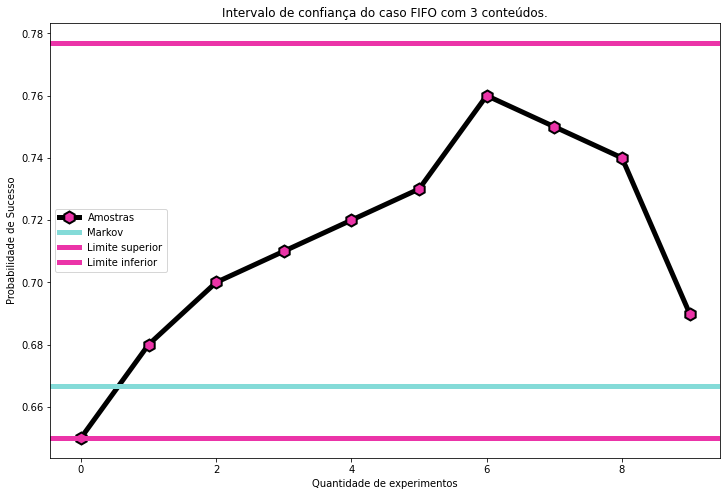

In [ ]:
str_tipo = 'FIFO'
lim_sup = 0.777
lim_inf = 0.65
num_elem = 3
tipo = fifo1_3
cenario = 1

plotar_intervalo(tipo, str_tipo, sucessos, lim_sup, lim_inf, num_elem, cenario)

 ## Cenário 1: 3 Conteúdos

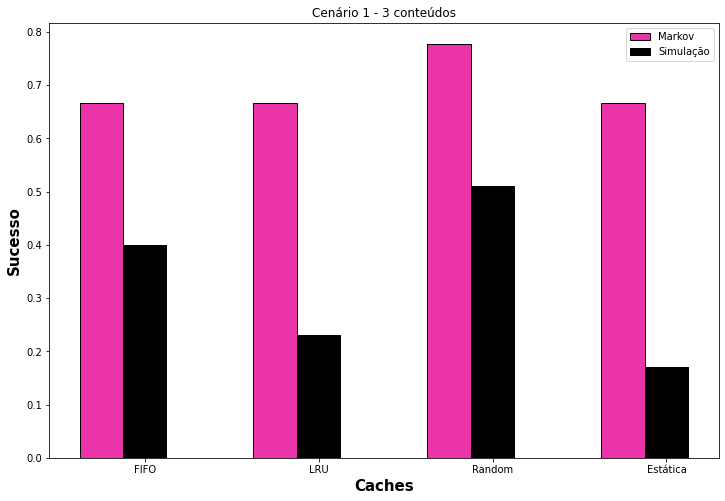

In [ ]:
markov = [fifo1_3, lru1_3, random1_3, estatico1_3]
simulacao = [0.4, 0.23, 0.51, 0.17]

plotar_barras(markov, simulacao)

 ## Cenário 1: 4 Conteúdos

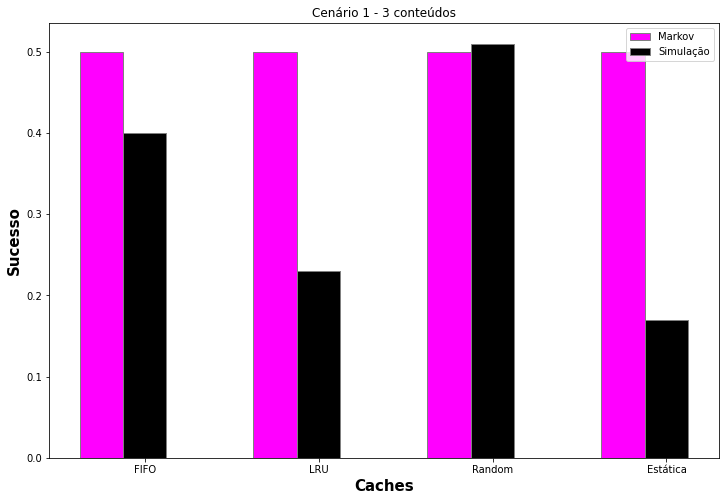

In [ ]:
markov = [fifo1_4, lru1_4, random1_4, estatico1_4]
simulacao = [0.4, 0.23, 0.51, 0.17]

plotar_barras(markov, simulacao)

 ## Cenário 2: 3 Conteúdos

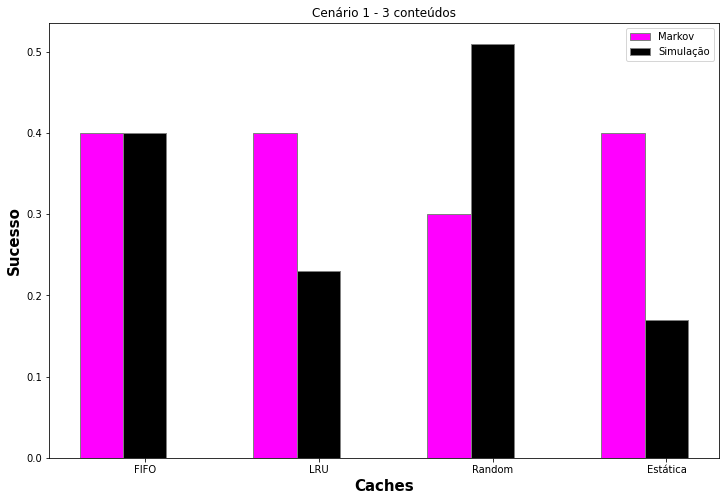

In [ ]:
markov = [fifo2_3, lru2_3, random2_3, estatico2_3]
simulacao = [0.4, 0.23, 0.51, 0.17]

plotar_barras(markov, simulacao)

 ## Cenário 2: 4 Conteúdos

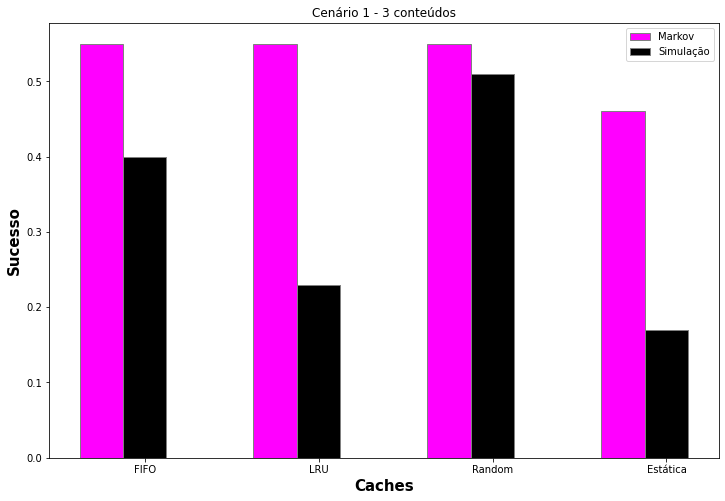

In [ ]:
markov = [fifo2_4, lru2_4, random2_4, estatico2_4]
simulacao = [0.4, 0.23, 0.51, 0.17]

plotar_barras(markov, simulacao)